# Load and import 

In [2]:
R.version.string
getwd()
library('dplyr')
library("DESeq2")
library('stringr')
library('EnhancedVolcano')
library('pheatmap')
library("vsn")
library('tidyr')
library('ggplot2')

[1] "R version 4.3.3 (2024-02-29)"

[1] "/media/HDD2/donghui/Pathogen_JC14_3DM"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching 

In [3]:
# Read the xlsx file
map_id_name <- readxl::read_excel("../gene_table_and_other_scripts/gene_table.xlsx")
map_id_name <- map_id_name %>% mutate(gene_name = gene_name %>% str_remove("'"))
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT1G78995,AT1G78995
AT5G55320,AT5G55320


In [4]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

### sample data

In [5]:
sample_data = readxl::read_excel("./refs//3-DM_shoots_root_JC14_adr1s_pathogen.xlsx") %>% as.data.frame
rownames(sample_data) <- sample_data$short_name 
sample_data

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group3,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


## Hisat2

In [6]:
# skip the first line, it is command of featurecount
pathogen_data <- read.table("..//RNA_seq_Pathogen/featureCounts//all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)
pathogen_data %>% sample_n(2)

Geneid,Chr,Start,End,Strand,Length,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.A.LFC7257_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.C.LFC7271_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.C.LFC7250_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.B.LFC7249_L3_sorted.bam,⋯,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.A.LFC7269_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.B.LFC7264_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.B.LFC7255_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.C.LFC7259_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.A.LFC7263_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.A.LFC7251_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.C.LFC7265_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.A.LFC7254_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.A.LFC7266_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.A.LFC7272_L2_sorted.bam
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT2G04800,2;2;2;2;2;2;2,1687173;1687173;1687173;1687194;1687722;1687766;1687789,1687616;1687939;1687616;1687616;1687939;1687880;1687939,-;-;-;-;-;-;-,767,4,2,0,2,⋯,0,0,2,4,0,0,2,9,4,0
AT4G05670,4,5715752,5716170,+,419,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
# skip the first line, it is command of featurecount
DM10_DM11_data <- read.table("../3DMs_pathogen/featureCounts/DM10_DM11_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [8]:
# skip the first line, it is command of featurecount
DM1_DM2d_data <- read.table("../3DMs_pathogen/featureCounts/DM1_DM2d_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [9]:
# skip the first line, it is command of featurecount
DM6_DM7_data <- read.table("../3DMs_pathogen/featureCounts/DM6_DM7_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [10]:
# skip the first line, it is command of featurecount
JC14_data <- read.table("../JC14_and_DMs//featureCounts/JC14_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [11]:
data <- pathogen_data %>% select(-c( Chr, Start, End, Strand, Length)) %>% 
    full_join(DM10_DM11_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>%
    full_join(DM6_DM7_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>%
    full_join(DM1_DM2d_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>% 
    full_join(JC14_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) 

In [12]:
length(names(data))
names(data)

[1] 83

[1] "Geneid"                                                                          
 [2] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.A.LFC7257_L2_sorted.bam" 
 [3] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.C.LFC7271_L2_sorted.bam"
 [4] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.C.LFC7250_L3_sorted.bam"  
 [5] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.B.LFC7249_L3_sorted.bam"  
 [6] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.B.LFC7273_L2_sorted.bam"
 [7] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.B.LFC7258_L2_sorted.bam" 
 [8] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.A.LFC7275_L2_sorted.bam"
 [9] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.C.LFC7277_L3_sorted.bam"
[10] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.B.LFC7276_L2_sorted.bam"
[11] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.C.LFC7256_L2_sorted.bam" 
[12] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.C.LFC7274_L3_sorted.bam"
[13] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.A.LFC7248_L2_sorted.bam"  
[14] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.B.LFC7252_L2_sorted.bam" 
[15] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.C.LFC7268_L2_sorted.bam"
[16] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.C.LFC7253_L3_sorted.bam" 
[17] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.A.LFC7260_L2_sorted.bam"
[18] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.C.LFC7262_L2_sorted.bam"
[19] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.B.LFC7270_L2_sorted.bam"
[20] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.B.LFC7261_L3_sorted.bam"
[21] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.B.LFC7267_L2_sorted.bam"
[22] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.A.LFC7269_L3_sorted.bam"
[23] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.B.LFC7264_L3_sorted.bam"
[24] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.B.LFC7255_L2_sorted.bam" 
[25] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.C.LFC7259_L2_sorted.bam" 
[26] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.A.LFC7263_L2_sorted.bam"
[27] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.A.LFC7251_L2_sorted.bam" 
[28] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.C.LFC7265_L2_sorted.bam"
[29] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.A.LFC7254_L2_sorted.bam" 
[30] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.A.LFC7266_L3_sorted.bam"
[31] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.A.LFC7272_L2_sorted.bam"
[32] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138684_sorted.bam"                          
[33] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138674_sorted.bam"                          
[34] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138670_sorted.bam"                          
[35] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138668_sorted.bam"                          
[36] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138667_sorted.bam"                          
[37] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138669_sorted.bam"                          
[38] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138679_sorted.bam"                          
[39] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138681_sorted.bam"                          
[40] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138676_sorted.bam"                          
[41] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138671_sorted.bam"                          
[42] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138682_sorted.bam"                          
[43] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138672_sorted.bam"                          
[44] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138675_sorted.bam"                          
[45] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138673_sorted.bam"                          
[46] "X.media.HDD3.3DM.DM10_DM11.2_bam.ER

In [13]:
names(data) <- names(data) %>% 
    str_remove('X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.') %>%    
    str_remove('.LFC\\d{4}_L\\d{1,2}_sorted.bam') %>% str_remove('X.media.HDD3.3DM.') %>%
     str_remove('DM10_DM11.2_bam.') %>% str_remove('DM6_DM7.2_bam.') %>%
     str_remove('DM1_DM2d.2_bam.') %>% str_remove('_sorted.bam') %>% str_replace_all('\\.', '-') %>% str_remove('_L4') %>%
    str_remove('X-media-HDD3-JC14-2_bam-') %>% str_remove('-LFD\\d{4,5}_L2$')
names(data)

[1] "Geneid"     "S6-A"       "M20-C"      "C-C"        "C-B"       
 [6] "R20-B"      "S6-B"       "S20-A"      "S20-C"      "S20-B"     
[11] "R6-C"       "R20-C"      "C-A"        "M6-B"       "S12-C"     
[16] "M6-C"       "M12-A"      "M12-C"      "M20-B"      "M12-B"     
[21] "S12-B"      "M20-A"      "R12-B"      "R6-B"       "S6-C"      
[26] "R12-A"      "M6-A"       "R12-C"      "R6-A"       "S12-A"     
[31] "R20-A"      "ERR4138684" "ERR4138674" "ERR4138670" "ERR4138668"
[36] "ERR4138667" "ERR4138669" "ERR4138679" "ERR4138681" "ERR4138676"
[41] "ERR4138671" "ERR4138682" "ERR4138672" "ERR4138675" "ERR4138673"
[46] "ERR4138678" "ERR4138683" "ERR4138680" "ERR4138677" "17-LCH3320"
[51] "14-LCH3317" "27-LCH3324" "11-LCH3314" "15-LCH3318" "21-LCH3322"
[56] "16-LCH3319" "18-LCH3321" "22-LCH3323" "28-LCH3325" "12-LCH3315"
[61] "13-LCH3316" "COL7_ROO"   "DM5_ROOT"   "DM1_ROOT"   "COL3_ROO"  
[66] "DM6_SHOO"   "DM13_ROO"   "DM2_SHOO"   "COL4_SHO"   "DM14_SHO"  
[71] "COL8_SHO"   "CJ-1"       "CJ-2"       "C12-2"      "OJ-2"      
[76] "DJ-3"       "DJ-2"       "OJ-3"       "OJ-1"       "C14-1"     
[81] "C12-1"      "CJ-3"       "DJ-1"

 <font size="4"><span style="color:blue">
    the naming:  
               S is Rps4, M is Mock, C is control, R is Rpt2  
</span></font>

In [14]:
countData <- data %>% dplyr::select ( sample_data$Bam_name)
rownames(countData) <- data$Geneid
head(countData)

,DM2_SHOO,COL4_SHO,DM6_SHOO,COL8_SHO,DM14_SHO,12-LCH3315,14-LCH3317,16-LCH3319,18-LCH3321,22-LCH3323,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,90,4,129,0,96,71,0,158,0,78,⋯,48,0,0,0,210,208,196,224,179,143
AT1G78930,209,402,111,462,168,383,369,372,331,410,⋯,850,461,619,650,301,202,274,259,312,289
AT1G71695,1568,10440,1412,12570,1578,4176,13325,2848,13770,4118,⋯,4132,4491,4511,4365,2924,2886,2595,3360,3005,3381
AT1G58983,18,7,9,4,9,29,32,28,36,35,⋯,63,67,51,65,34,33,18,32,28,46
AT1G12980,6,13,6,2,22,20,4,29,0,30,⋯,12,0,0,5,10,4,0,10,12,13
AT1G45223,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [15]:
all (names(countData) == sample_data$Bam_name)

[1] TRUE

In [16]:
names(countData) <- sample_data$short_name
sample_data <- sample_data %>% dplyr::rename('group' = 'group3')
rownames(sample_data) <- sample_data$short_name

In [17]:
all (names(countData) == rownames(sample_data))

[1] TRUE

## remove root samples, only keep shoot sample

In [18]:
sample_data <- sample_data %>% filter(tissue == 'Shoot')
countData <- countData %>% select(rownames(sample_data))
all (names(countData) == rownames(sample_data))

[1] TRUE

In [19]:
countData %>% saveRDS('./Rdata/countData_3DM_shoots_DMs_JC14_adr1s_pathogen.rds')

In [91]:
countData %>% sample_n(3)

,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,DM6/DM7_3,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT2G27740,4,61,0,42,0,28,216,16,133,6,⋯,48,90,97,56,57,49,55,43,84,75
AT5G06820,99,20,83,33,127,67,64,119,58,105,⋯,30,19,28,28,40,38,60,58,60,38
AT1G32850,7,19,2,4,0,2,16,10,0,0,⋯,6,20,8,0,8,5,11,5,11,2


In [92]:
countData %>% names()

[1] "DM1/DM2d_1"  "Col-0_12_1"  "DM1/DM2d_2"  "Col-0_12_2"  "DM1/DM2d_3" 
 [6] "DM6/DM7_1"   "Col-0_14_1"  "DM6/DM7_2"   "Col-0_14_2"  "DM6/DM7_3"  
[11] "Col-0_14_3"  "DM10/DM11_6" "DM10/DM11_5" "DM10/DM11_4" "DM10/DM11_3"
[16] "DM10/DM11_2" "DM10/DM11_1" "Tuescha-9_6" "Tuescha-9_5" "Tuescha-9_4"
[21] "Tuescha-9_3" "Tuescha-9_2" "Tuescha-9_1" "Cdm-0_6"     "Cdm-0_5"    
[26] "Cdm-0_4"     "Cdm-0_3"     "Cdm-0_2"     "Cdm-0_1"     "C12-1"      
[31] "C12-2"       "C14-1"       "DJ-1"        "DJ-2"        "DJ-3"       
[36] "CJ-1"        "CJ-2"        "CJ-3"        "OJ-1"        "OJ-2"       
[41] "OJ-3"        "C-A"         "C-B"         "C-C"         "M6-A"       
[46] "M6-B"        "M6-C"        "R6-A"        "R6-B"        "R6-C"       
[51] "S6-A"        "S6-B"        "S6-C"        "M12-A"       "M12-B"      
[56] "M12-C"       "R12-A"       "R12-B"       "R12-C"       "S12-A"      
[61] "S12-B"       "S12-C"       "M20-A"       "M20-B"       "M20-C"      
[66] "R20-A"       "R20-B"       "R20-C"       "S20-A"       "S20-B"      
[71] "S20-C"

In [20]:
sample_data %>% saveRDS('./Rdata/sample_data_3DM_shoots_DMs_JC14_adr1s_pathogen.rds')

In [88]:
sample_data 

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


In [90]:
sample_data %>% filter( group %>% str_detect('DM1/DM2d|DM6/DM7|WT|control|Mock|Avr'))

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
DM6/DM7_3,DM6/DM7_3,DM6/DM7_Shoot_3,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,3,22-LCH3323,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
DJ-1,DJ-1,DM1/DM2d_adr1s_1,DM adr1s,Shoot,DM1_DM2d,12,Col-0,1/2MS,1,DJ-1,NA,NA,NA,DM1/DM2d_adr1s,DM1/DM2d_adr1s,0,control,4
DJ-2,DJ-2,DM1/DM2d_adr1s_2,DM adr1s,Shoot,DM1_DM2d,12,Col-0,1/2MS,2,DJ-2,NA,NA,NA,DM1/DM2d_adr1s,DM1/DM2d_adr1s,0,control,4
DJ-3,DJ-3,DM1/DM2d_adr1s_3,DM adr1s,Shoot,DM1_DM2d,12,Col-0,1/2MS,3,DJ-3,NA,NA,NA,DM1/DM2d_adr1s,DM1/DM2d_adr1s,0,control,4


In [93]:
sample_data 

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


#### count table for GEO

In [94]:
# Load required libraries
library(dplyr)

# Create mapping for the first 18 columns based on SRA submission table
# The SRA table shows the correct naming convention we need to follow

# Current column names (first 18 that need renaming)
current_names <- c(
  "DM1/DM2d_1", "Col-0_12_1", "DM1/DM2d_2", "Col-0_12_2", "DM1/DM2d_3",
  "DM6/DM7_1", "Col-0_14_1", "DM6/DM7_2", "Col-0_14_2", "DM6/DM7_3", "Col-0_14_3",
  "C12-1", "C12-2", "C14-1", "DJ-1", "DJ-2", "DJ-3", "CJ-1"
)

# New names based on SRA submission table
new_names <- c(
  "DM1_DM2d_12DAS_Shoot_1", "Col-0_12DAS_Shoot_1", "DM1_DM2d_12DAS_Shoot_2", 
  "Col-0_12DAS_Shoot_2", "DM1_DM2d_12DAS_Shoot_3",
  "DM6_DM7_Shoot_14DAS_1", "Col-0_Shoot_14DAS_1", "DM6_DM7_Shoot_14DAS_2", 
  "Col-0_Shoot_14DAS_2", "DM6_DM7_Shoot_14DAS_3", "Col-0_Shoot_14DAS_3",
  "DM1_DM2d_adr1s_1", "DM1_DM2d_adr1s_2", "DM1_DM2d_adr1s_3",
  "DM6_DM7_adr1s_1", "DM6_DM7_adr1s_2", "DM6_DM7_adr1s_3",
  "Col-0_adr1s_1"
)

# Wait, I need to check the exact mapping. Let me look at the SRA table more carefully
# From the SRA table, the correct order appears to be:

# Correct mapping based on SRA submission table order
sra_names <- c(
  "DM1_DM2d_12DAS_Shoot_1",     # DM1/DM2d_1
  "DM1_DM2d_12DAS_Shoot_2",     # DM1/DM2d_2  
  "DM1_DM2d_12DAS_Shoot_3",     # DM1/DM2d_3
  "Col-0_12DAS_Shoot_1",        # Col-0_12_1
  "Col-0_12DAS_Shoot_2",        # Col-0_12_2
  "DM6_DM7_Shoot_14DAS_1",      # DM6/DM7_1
  "DM6_DM7_Shoot_14DAS_2",      # DM6/DM7_2
  "DM6_DM7_Shoot_14DAS_3",      # DM6/DM7_3
  "Col-0_Shoot_14DAS_1",        # Col-0_14_1
  "Col-0_Shoot_14DAS_2",        # Col-0_14_2
  "Col-0_Shoot_14DAS_3",        # Col-0_14_3
  "DM1_DM2d_adr1s_1",           # C12-1 -> DJ-1
  "DM1_DM2d_adr1s_2",           # C12-2 -> DJ-2  
  "DM1_DM2d_adr1s_3",           # C14-1 -> DJ-3
  "DM6_DM7_adr1s_1",            # DJ-1 -> CJ-1
  "DM6_DM7_adr1s_2",            # DJ-2 -> CJ-2
  "DM6_DM7_adr1s_3",            # DJ-3 -> CJ-3
  "Col-0_adr1s_1"               # CJ-1
)

# But I need to match based on the current order in countData
# Let me create the mapping more carefully

# Create name mapping vector
name_mapping <- c(
  "DM1/DM2d_1" = "DM1_DM2d_12DAS_Shoot_1",
  "Col-0_12_1" = "Col-0_12DAS_Shoot_1", 
  "DM1/DM2d_2" = "DM1_DM2d_12DAS_Shoot_2",
  "Col-0_12_2" = "Col-0_12DAS_Shoot_2",
  "DM1/DM2d_3" = "DM1_DM2d_12DAS_Shoot_3",
  "DM6/DM7_1" = "DM6_DM7_Shoot_14DAS_1",
  "Col-0_14_1" = "Col-0_Shoot_14DAS_1",
  "DM6/DM7_2" = "DM6_DM7_Shoot_14DAS_2", 
  "Col-0_14_2" = "Col-0_Shoot_14DAS_2",
  "DM6/DM7_3" = "DM6_DM7_Shoot_14DAS_3",
  "Col-0_14_3" = "Col-0_Shoot_14DAS_3",
  "DJ-1" = "DM1_DM2d_adr1s_1",
  "DJ-2" = "DM1_DM2d_adr1s_2", 
  "DJ-3" = "DM1_DM2d_adr1s_3",
  "OJ-1" = "DM6_DM7_adr1s_1",
  "OJ-2" = "DM6_DM7_adr1s_2",
  "OJ-3" = "DM6_DM7_adr1s_3",
  "CJ-1" = "Col-0_adr1s_1",
  "CJ-2" = "Col-0_adr1s_2",
  "CJ-3" = "Col-0_adr1s_3"
)

# Get current column names
current_colnames <- names(countData)

# Apply renaming only to the columns that have mappings
new_colnames <- current_colnames
for(i in 1:length(current_colnames)) {
  if(current_colnames[i] %in% names(name_mapping)) {
    new_colnames[i] <- name_mapping[current_colnames[i]]
  }
}

# Rename the columns
names(countData) <- new_colnames

# Select only the 18 ADR1 experiment samples based on SRA table
dm_samples <- c(
  "DM1_DM2d_12DAS_Shoot_1", "DM1_DM2d_12DAS_Shoot_2", "DM1_DM2d_12DAS_Shoot_3",
  "Col-0_12DAS_Shoot_1", "Col-0_12DAS_Shoot_2", 
  "DM6_DM7_Shoot_14DAS_1", "DM6_DM7_Shoot_14DAS_2", "DM6_DM7_Shoot_14DAS_3",
  "Col-0_Shoot_14DAS_1", "Col-0_Shoot_14DAS_2", "Col-0_Shoot_14DAS_3",
  "DM1_DM2d_adr1s_1", "DM1_DM2d_adr1s_2", "DM1_DM2d_adr1s_3",
  "DM6_DM7_adr1s_1", "DM6_DM7_adr1s_2", "DM6_DM7_adr1s_3",
  "Col-0_adr1s_1", "Col-0_adr1s_2", "Col-0_adr1s_3"
)

# Check which samples are actually present in the data
available_samples <- dm_samples[dm_samples %in% names(countData)]
cat("Available DM samples in countData:\n")
print(available_samples)

# Create DMs.raw.counts.txt with available samples
DMs_counts <- countData[, available_samples, drop = FALSE]

# Add gene IDs as the first column (assuming rownames are gene IDs)
DMs_counts <- DMs_counts %>%
  mutate(gene_id = rownames(.), .before = 1)

# Write to file
write.table(DMs_counts, "DMs.raw.counts.txt", 
           sep = "\t", row.names = FALSE, quote = FALSE)

# Display summary
cat("\nSummary of DMs.raw.counts.txt:\n")
cat("Dimensions:", nrow(DMs_counts), "genes x", ncol(DMs_counts)-1, "samples\n")
cat("Sample names:\n")
print(names(DMs_counts)[-1])  # Exclude gene_id column

# Display first few rows
cat("\nFirst 3 rows of DMs.raw.counts.txt:\n")
print(head(DMs_counts, 3))

Available DM samples in countData:
 [1] "DM1_DM2d_12DAS_Shoot_1" "DM1_DM2d_12DAS_Shoot_2" "DM1_DM2d_12DAS_Shoot_3"
 [4] "Col-0_12DAS_Shoot_1"    "Col-0_12DAS_Shoot_2"    "DM6_DM7_Shoot_14DAS_1" 
 [7] "DM6_DM7_Shoot_14DAS_2"  "DM6_DM7_Shoot_14DAS_3"  "Col-0_Shoot_14DAS_1"   
[10] "Col-0_Shoot_14DAS_2"    "Col-0_Shoot_14DAS_3"    "DM1_DM2d_adr1s_1"      
[13] "DM1_DM2d_adr1s_2"       "DM1_DM2d_adr1s_3"       "DM6_DM7_adr1s_1"       
[16] "DM6_DM7_adr1s_2"        "DM6_DM7_adr1s_3"        "Col-0_adr1s_1"         
[19] "Col-0_adr1s_2"          "Col-0_adr1s_3"         

Summary of DMs.raw.counts.txt:
Dimensions: 32833 genes x 20 samples
Sample names:
 [1] "DM1_DM2d_12DAS_Shoot_1" "DM1_DM2d_12DAS_Shoot_2" "DM1_DM2d_12DAS_Shoot_3"
 [4] "Col-0_12DAS_Shoot_1"    "Col-0_12DAS_Shoot_2"    "DM6_DM7_Shoot_14DAS_1" 
 [7] "DM6_DM7_Shoot_14DAS_2"  "DM6_DM7_Shoot_14DAS_3"  "Col-0_Shoot_14DAS_1"   
[10] "Col-0_Shoot_14DAS_2"    "Col-0_Shoot_14DAS_3"    "DM1_DM2d_adr1s_1"      
[13] "DM1_DM2d_adr1s_2"    

In [95]:
# Load required library
library(dplyr)

# Extract flood assay samples from your countData
# Based on your sample_data, flood assay samples are in batch 5 and include:
# Mock treatments (M6, M12, M20), AvrRpt2 treatments (R6, R12, R20), 
# AvrRps4 treatments (S6, S12, S20), and controls (C)

# Define the flood assay sample patterns
flood_samples <- c(
  # Controls
  "C-A", "C-B", "C-C",
  # Mock 6h
  "M6-A", "M6-B", "M6-C",
  # AvrRpt2 6h  
  "R6-A", "R6-B", "R6-C",
  # AvrRps4 6h
  "S6-A", "S6-B", "S6-C",
  # Mock 12h
  "M12-A", "M12-B", "M12-C",
  # AvrRpt2 12h
  "R12-A", "R12-B", "R12-C", 
  # AvrRps4 12h
  "S12-A", "S12-B", "S12-C",
  # Mock 20h
  "M20-A", "M20-B", "M20-C",
  # AvrRpt2 20h
  "R20-A", "R20-B", "R20-C",
  # AvrRps4 20h
  "S20-A", "S20-B", "S20-C"
)

# Extract flood assay data from countData
flood_countData <- countData %>%
  select(all_of(flood_samples))

# Create new column names matching GEO metadata template
new_names <- c(
  # Controls
  "control_1", "control_2", "control_3",
  # Mock 6h
  "Mock-6h_1", "Mock-6h_2", "Mock-6h_3",
  # AvrRpt2 6h
  "AvrRpt2-6h_1", "AvrRpt2-6h_2", "AvrRpt2-6h_3",
  # AvrRps4 6h
  "AvrRps4-6h_1", "AvrRps4-6h_2", "AvrRps4-6h_3",
  # Mock 12h
  "Mock-12h_1", "Mock-12h_2", "Mock-12h_3",
  # AvrRpt2 12h
  "AvrRpt2-12h_1", "AvrRpt2-12h_2", "AvrRpt2-12h_3",
  # AvrRps4 12h
  "AvrRps4-12h_1", "AvrRps4-12h_2", "AvrRps4-12h_3",
  # Mock 20h
  "Mock-20h_1", "Mock-20h_2", "Mock-20h_3",
  # AvrRpt2 20h
  "AvrRpt2-20h_1", "AvrRpt2-20h_2", "AvrRpt2-20h_3",
  # AvrRps4 20h
  "AvrRps4-20h_1", "AvrRps4-20h_2", "AvrRps4-20h_3"
)

# Rename columns
names(flood_countData) <- new_names

# Add gene IDs as the first column (assuming rownames are gene IDs)
flood_countData <- flood_countData %>%
  mutate(gene_id = rownames(.), .before = 1)

# Write to tab-delimited file
write.table(flood_countData, 
           file = "flood.raw.counts.txt",
           sep = "\t",
           row.names = FALSE,
           col.names = TRUE,
           quote = FALSE)

# Verify the output
cat("Generated flood.raw.counts.txt with dimensions:", dim(flood_countData), "\n")
cat("Column names:", names(flood_countData)[1:10], "...\n")
cat("First few rows:\n")
print(head(flood_countData[,1:6]))

Generated flood.raw.counts.txt with dimensions: 32833 31 
Column names: gene_id control_1 control_2 control_3 Mock-6h_1 Mock-6h_2 Mock-6h_3 AvrRpt2-6h_1 AvrRpt2-6h_2 AvrRpt2-6h_3 ...
First few rows:
            gene_id control_1 control_2 control_3 Mock-6h_1 Mock-6h_2
AT1G30814 AT1G30814         0         0         0         0         1
AT1G78930 AT1G78930       338       263       219       658       717
AT1G71695 AT1G71695      5683      4995      5382      5477      5740
AT1G58983 AT1G58983        60        65        58        40        44
AT1G12980 AT1G12980        26         6         5        20         8
AT1G45223 AT1G45223         0         0         0         0         0


## build dds

In [21]:
## construct dds

# put the variable of interest at the end of formula so res function will take condition by default
dds <- DESeqDataSetFromMatrix(countData, colData=sample_data, design= ~  batch + group) 
dds <- dds[ rowSums(counts(dds)) > 5, ]

dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a mess

### salmon quants files

In [22]:
dds <- readRDS('./Rdata/dds_hisat2_design= batch + group.rds')

In [23]:
res_AvrRpt2_vs_Control <- results(dds, contrast = c('group','AvrRps4-20h', 'Mock-20h'))  


In [24]:
# Estimate Dispersion Trend?
vsd <- vst(dds)

In [25]:
counts_df <- dds %>% counts %>% as.data.frame

In [26]:
counts_df %>% names()

[1] "DM1/DM2d_1"  "Col-0_12_1"  "DM1/DM2d_2"  "Col-0_12_2"  "DM1/DM2d_3" 
 [6] "DM6/DM7_1"   "Col-0_14_1"  "DM6/DM7_2"   "Col-0_14_2"  "DM6/DM7_3"  
[11] "Col-0_14_3"  "DM10/DM11_6" "DM10/DM11_5" "DM10/DM11_4" "DM10/DM11_3"
[16] "DM10/DM11_2" "DM10/DM11_1" "Tuescha-9_6" "Tuescha-9_5" "Tuescha-9_4"
[21] "Tuescha-9_3" "Tuescha-9_2" "Tuescha-9_1" "Cdm-0_6"     "Cdm-0_5"    
[26] "Cdm-0_4"     "Cdm-0_3"     "Cdm-0_2"     "Cdm-0_1"     "C12-1"      
[31] "C12-2"       "C14-1"       "DJ-1"        "DJ-2"        "DJ-3"       
[36] "CJ-1"        "CJ-2"        "CJ-3"        "OJ-1"        "OJ-2"       
[41] "OJ-3"        "C-A"         "C-B"         "C-C"         "M6-A"       
[46] "M6-B"        "M6-C"        "R6-A"        "R6-B"        "R6-C"       
[51] "S6-A"        "S6-B"        "S6-C"        "M12-A"       "M12-B"      
[56] "M12-C"       "R12-A"       "R12-B"       "R12-C"       "S12-A"      
[61] "S12-B"       "S12-C"       "M20-A"       "M20-B"       "M20-C"      
[66] "R20-A"       "R20-B"       "R20-C"       "S20-A"       "S20-B"      
[71] "S20-C"

### output tsv for diffTF

In [27]:
library(dplyr)

counts_df_DM1_DM2d <- counts_df %>% 
  select(matches("DM1/DM2d|Col-0_12|C12")) %>%   
  rename_with(~ gsub("DM1/DM2d", "DM1-DM2d", .), starts_with("DM1/DM2d")) %>%
  rename_with(~ gsub("Col-0_12", "C12", .), starts_with("Col-0_12")) %>% 
    tibble::rownames_to_column('ENSEMBL') %>%rowwise() %>%  # Add this to ensure row-wise operations
  mutate(C12_3 = as.integer(mean(c(`C12-1`, `C12-2`)))) %>% as.data.frame %>% select( - c(`C12-1`, `C12-2`))

counts_df_DM1_DM2d %>% sample_n(10)

ENSEMBL,DM1-DM2d_1,C12_1,DM1-DM2d_2,C12_2,DM1-DM2d_3,C12_3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
AT3G50390,6,12,12,7,17,7
AT1G51030,5003,2,4650,0,5782,0
AT3G06740,427,893,335,683,387,637
AT3G60210,523,1886,418,1850,553,1666
AT3G49130,4571,92,3212,62,3265,0
AT1G08260,1974,2881,1939,2281,1845,1059
AT1G53640,4,2,2,0,2,2
AT5G07670,1377,1112,1472,1181,1278,715
AT2G03220,2693,848,2450,909,2424,533


In [28]:
counts_df_DM1_DM2d %>% select( -ENSEMBL)%>%
  summarise(across(everything(), sum, na.rm = TRUE))

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(everything(), sum, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


DM1-DM2d_1,C12_1,DM1-DM2d_2,C12_2,DM1-DM2d_3,C12_3
<int>,<int>,<int>,<int>,<int>,<int>
104369815,89792163,94838398,86880248,93548922,38759460


In [29]:
counts_df_DM1_DM2d

ENSEMBL,DM1-DM2d_1,C12_1,DM1-DM2d_2,C12_2,DM1-DM2d_3,C12_3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,90,4,129,0,96,0
AT1G78930,209,402,111,462,168,240
AT1G71695,1568,10440,1412,12570,1578,6020
AT1G58983,18,7,9,4,9,41
AT1G12980,6,13,6,2,22,18
AT1G56250,308,201,185,603,328,20
AT1G66852,0,0,0,0,2,0
AT1G69810,664,117,603,131,550,49
AT1G72450,4899,3987,4077,2970,4207,1770


In [30]:
counts_df_DM6_DM7 <- counts_df %>%
  select(matches("DM6/DM7|Col-0_14")) %>%
  rename_with(~ gsub("DM6/DM7", "DM6-DM7", .), starts_with("DM6/DM7")) %>%
  rename_with(~ gsub("Col-0_14", "C14", .), starts_with("Col-0_14")) %>% tibble::rownames_to_column('ENSEMBL')
counts_df_DM6_DM7

ENSEMBL,DM6-DM7_1,C14_1,DM6-DM7_2,C14_2,DM6-DM7_3,C14_3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,71,0,158,0,78,6
AT1G78930,383,369,372,331,410,227
AT1G71695,4176,13325,2848,13770,4118,16683
AT1G58983,29,32,28,36,35,17
AT1G12980,20,4,29,0,30,8
AT1G56250,152,80,50,36,109,35
AT1G66852,0,0,0,0,0,0
AT1G69810,836,199,1606,113,1158,106
AT1G72450,7472,6953,6501,8467,6921,6937


In [31]:
mean(counts_df_DM6_DM7 %>% pull(ENSEMBL) %>% unique == ( counts_df_DM1_DM2d  %>% pull(ENSEMBL) %>% unique))

[1] 1

In [32]:
count_df_2DMs <- counts_df_DM1_DM2d %>% left_join(counts_df_DM6_DM7, by = 'ENSEMBL')

In [33]:
vst <- vst(dds) %>% assay()
vst %>% str

 num [1:27270, 1:71] 6.24 7.21 9.92 4.87 4.32 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:27270] "AT1G30814" "AT1G78930" "AT1G71695" "AT1G58983" ...
  ..$ : chr [1:71] "DM1/DM2d_1" "Col-0_12_1" "DM1/DM2d_2" "Col-0_12_2" ...


In [34]:
vst

,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,DM6/DM7_3,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
AT1G30814,6.235663,4.268762,6.714263,3.520197,6.351468,5.780265,3.520197,6.400279,3.520197,5.787898,⋯,5.972804,3.520197,3.520197,3.520197,7.889736,7.851626,7.881815,7.960395,7.617041,7.365988
AT1G78930,7.207703,8.409453,6.542543,8.671626,6.994069,7.699867,7.766443,7.415196,7.594403,7.676851,⋯,9.580665,8.719124,9.176385,9.240548,8.368015,7.813445,8.326283,8.152527,8.348281,8.281448
AT1G71695,9.916396,13.013200,9.868327,13.358380,9.986320,10.999011,12.789302,10.179678,12.801009,10.856516,⋯,11.827533,11.932162,11.992167,11.941196,11.557149,11.510407,11.476383,11.740901,11.523882,11.731104
AT1G58983,4.871967,4.502516,4.526513,4.288853,4.513334,5.044945,5.180350,4.891961,5.251266,5.117663,⋯,6.253345,6.308224,6.061202,6.313023,5.790260,5.743776,5.292515,5.723381,5.566609,6.064350
AT1G12980,4.319253,4.838531,4.347238,4.066893,5.033449,4.803466,4.135403,4.914525,3.520197,5.008945,⋯,4.851822,3.520197,3.520197,4.407480,4.836201,4.361317,3.520197,4.829621,4.919555,4.990433
AT1G56250,7.698009,7.499421,7.144552,9.037251,7.835833,6.573256,5.982459,5.306767,5.251266,6.119449,⋯,7.138350,5.338199,4.087342,5.495252,8.992950,8.851539,8.958720,7.785738,7.982196,8.170638
AT1G66852,3.520197,3.520197,3.520197,3.520197,3.995513,3.520197,3.520197,3.520197,3.520197,3.520197,⋯,3.520197,3.520197,3.520197,3.520197,3.520197,3.520197,3.520197,3.520197,3.520197,3.520197
AT1G69810,8.721759,6.835259,8.686661,7.035097,8.524250,8.740689,6.991952,9.374815,6.315968,9.070536,⋯,8.148849,6.870077,6.653394,6.637280,10.247135,10.490804,10.470825,9.628939,9.723411,9.610629
AT1G72450,11.536660,11.630904,11.374949,11.287055,11.380635,11.831262,11.855143,11.354377,12.102299,11.598339,⋯,14.005783,11.920619,11.894141,11.630359,14.258483,14.316417,14.339821,14.131821,14.211512,13.985110
AT1G76280,9.504233,10.294101,9.540664,10.457271,9.690755,9.272197,9.941595,9.456626,9.719653,9.127876,⋯,9.787471,10.397644,10.357974,10.280312,9.405817,9.404391,9.131237,9.553224,9.539573,9.483526


##### output for WGCNA

## PCA plot

In [35]:
library(PCAtools)
p <- PCAtools::pca(vst, metadata = sample_data, removeVar = 0.1)


Attaching package: ‘PCAtools’


The following objects are masked from ‘package:stats’:

    biplot, screeplot


-- removing the lower 10% of variables based on variance



In [36]:
sample_data

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


In [37]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res = 100)
# options(jupyter.plot_mimetypes = "image/svg+xml") 
options(jupyter.plot_mimetypes = "image/png") 
screeplot <- screeplot(p, axisLabSize = 8, titleLabSize = 22)  
screeplot %>%  ggsave(file = paste0("./plots/screeplot", Sys.time(), ".pdf") , width = 10, height = 6)

In [38]:
options(repr.plot.width=12, repr.plot.height=12, repr.plot.res = 100)
biplot(p, showLoadings = TRUE,
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5) %>% 
    ggsave(file = paste0("./plots/biplot_PCA_loading", Sys.time(), ".pdf") , width = 12, height = 12)

Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [39]:
biplot(p, #showLoadings = TRUE, 
       x = 'PC2', y = 'PC3',
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5) %>%
    ggsave(file = paste0("./plots/biplot_PCA_2_3_", Sys.time(), ".pdf") , width = 12, height = 12)

In [40]:
p_for_plot <- p$rotated %>% cbind(p$metadata) 

In [41]:
p_for_plot <- p_for_plot %>% mutate(shape_group = group2 %>% str_remove('-\\d{1,2}h$'))

In [42]:
p_for_plot <- p_for_plot %>%
  mutate(group = ifelse(group1 == "control", "Col-0_12", group))
# p_for_plot

In [43]:
p_for_plot$group %>% unique

[1] "DM1/DM2d"          "Col-0_12"          "DM6/DM7"          
 [4] "Col-0_14"          "DM10/DM11"         "Parents_DM10_DM11"
 [7] NA                  "Mock-6h"           "AvrRpt2-6h"       
[10] "AvrRps4-6h"        "Mock-12h"          "AvrRpt2-12h"      
[13] "AvrRps4-12h"       "Mock-20h"          "AvrRpt2-20h"      
[16] "AvrRps4-20h"

In [44]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

custom_shapes <- c(
  'control' = 16, 'Mock' = 18, 'AvrRps4' = 17, 'AvrRpt2' = 17, 
  "DM6/DM7" = 16, 'DM1/DM2d' = 16, 'DM10/DM11' = 16,
  'Col-0_12' = 16, 'Col-0_14' = 16,
  'Tuescha-9' = 16, 'Cdm-0' = 16, 'Tuescha-9' = 16, 'Cdm-0' = 16, 
  'DM6/DM7_adr1s' = 16, 'DM1/DM2d_adr1s' = 16, 'Col-0_adr1s' = 16
)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Duplicated `override.aes` is ignored.”
Warning message:
“Duplicated `override.aes` is ignored.”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


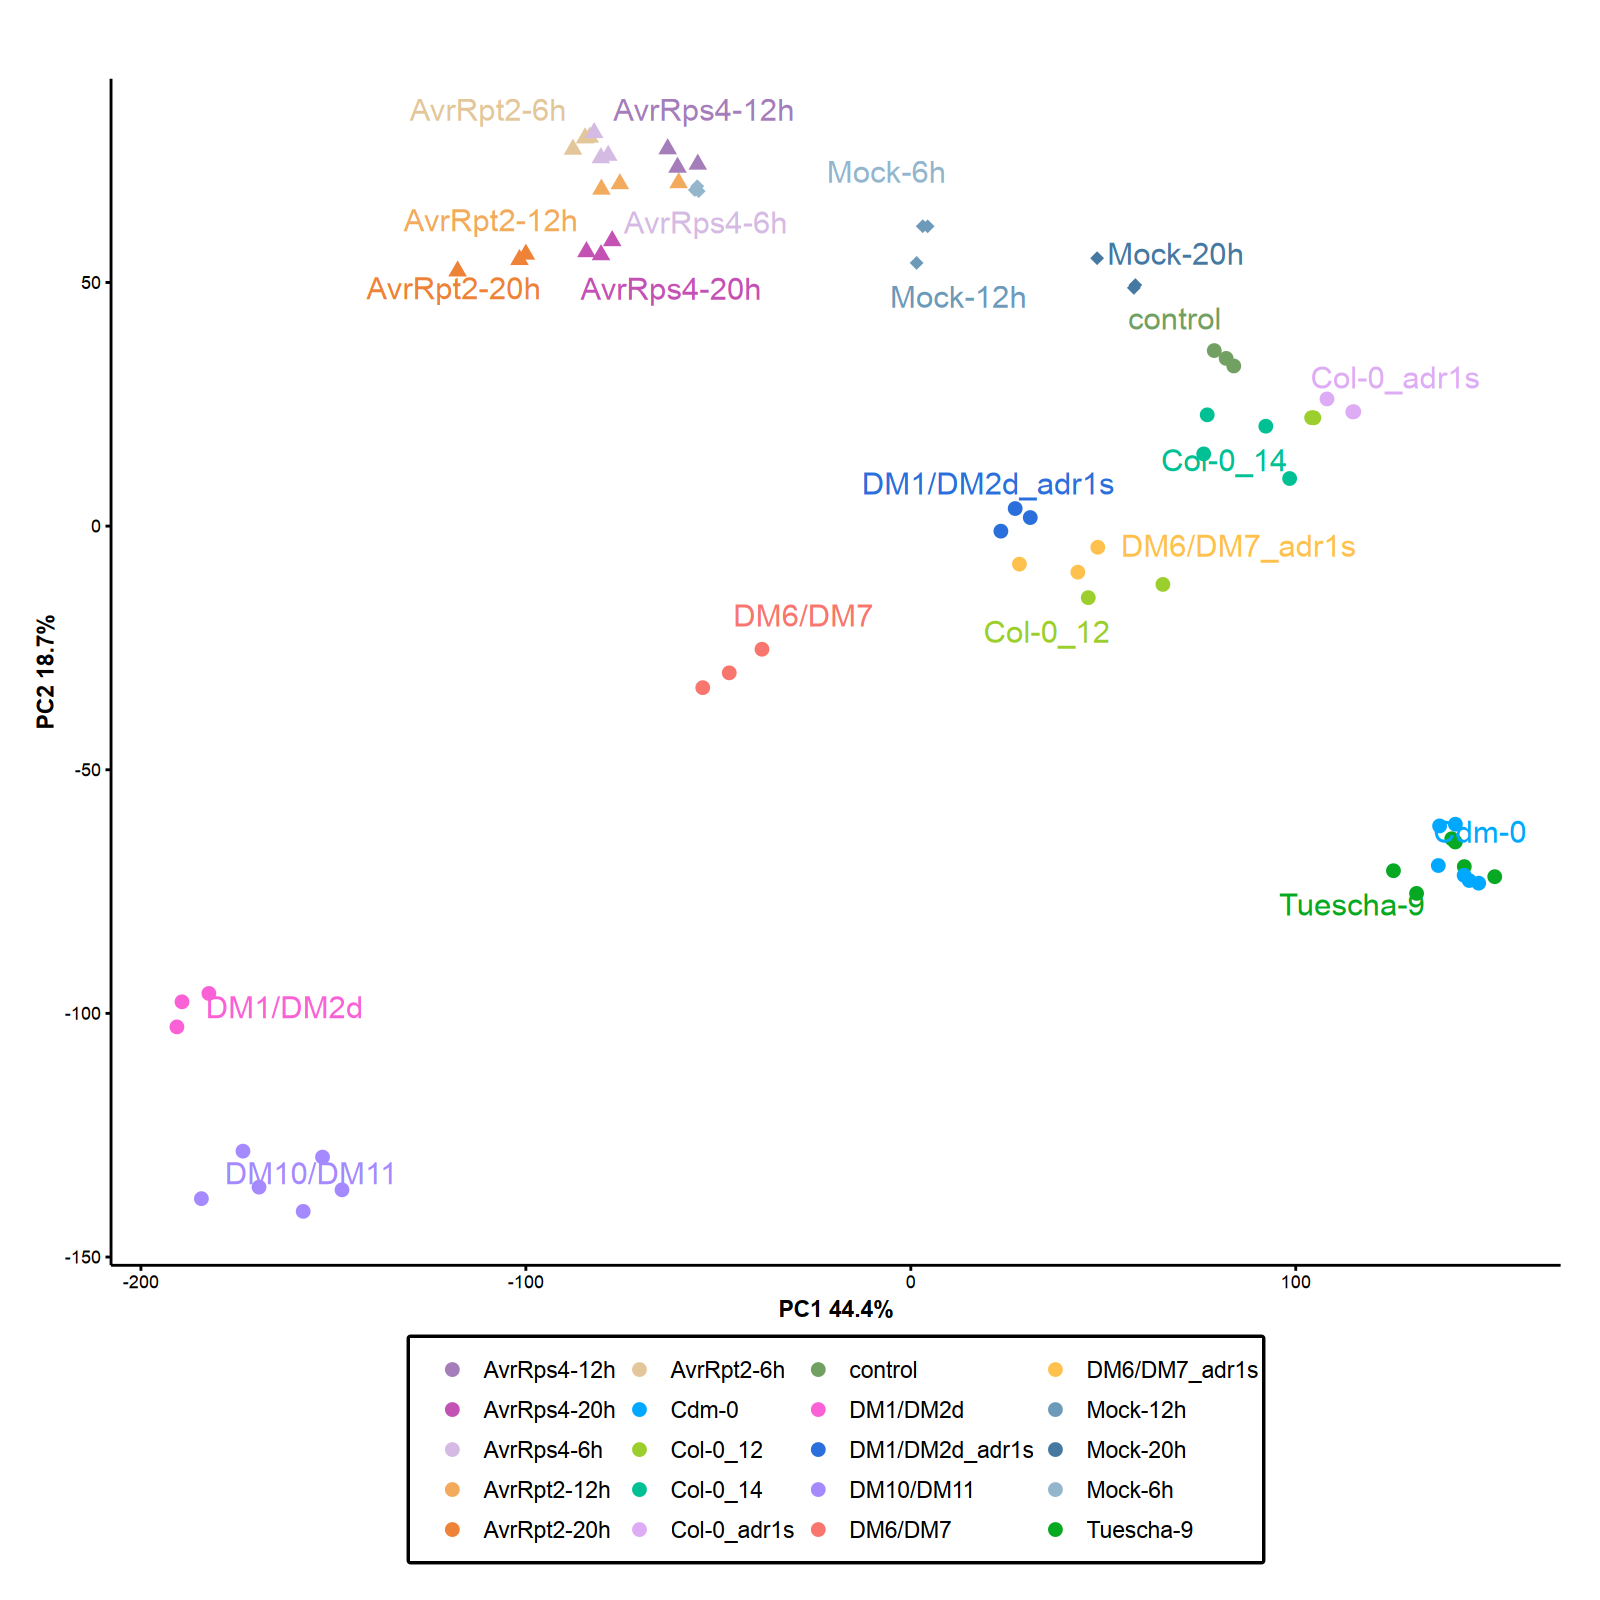

In [45]:
library(ggplot2)
library(ggrepel)
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 200)


# Create a new data frame with only one row per group
unique_group_data <- p_for_plot %>%
  group_by(group2) %>%
  slice_head(n = 1) %>%
  ungroup()

# Create PCA plot
pca_gg <- ggplot(p_for_plot, aes(PC1, PC2, fill = group2, color = group2, shape = shape_group)) + 
  # Add jittered points
  geom_jitter(size = 2, width = 0.05) + 
  # Add x-axis label
  xlab(paste0("PC1 ", round(p$variance[1], 1), "%")) + 
  # Add y-axis label
  ylab(paste0("PC2 ", round(p$variance[2], 1), "%")) + 
  # Apply publication theme
  theme_Publication() +
  # Add repel labels without "a" character
  geom_label_repel(aes(label = group2), data = unique_group_data,
                    segment.color = NA, fill = NA, label.size = 0, show.legend = FALSE) +
  # Customize shape legend
  scale_shape_manual(values = custom_shapes, name = "Group", guide = guide_none()) + 
  # Customize fill legend
  scale_fill_manual(values = custom_colors, name = NULL) + 
  # Customize color legend
  scale_color_manual(values = custom_colors, name = NULL) +
  # Apply publication theme again
  theme_Publication() +
  # Set legend aesthetics
  guides(fill = guide_legend(override.aes = list(shape = 16), ncol = 4, title = NULL),
         color = guide_legend(override.aes = list(shape = 16), ncol = 4, title = NULL)) +
  # Customize legend text size, key size, and add a border
  theme(
        legend.title = element_text(size = 8),
        legend.text = element_text(size = 8),
        legend.key.size = unit(1, "lines"),
        legend.box.background = element_rect(color = "black", size = 1)) +
  # Set legend position
  # theme(legend.position = c(0.62, 0.13)) 
  theme(legend.position = 'bottom')

# Show the plot
print(pca_gg)

# Save the plot
pca_gg %>% ggsave(file = paste0("./plots/PCA_PC1_PC2_", Sys.time(), ".pdf") , width = 6, height = 6)



In [46]:
pc2_pc3 <- ggplot(p_for_plot, aes(PC2, PC3, fill = group,color = group, shape = shape_group)) + 
  geom_jitter(size = 5, width = 0.05) + 
  xlab(paste0("PC2 ", round(p$variance[2], 1), "%")) + 
  ylab(paste0("PC3 ", round(p$variance[3], 1), "%")) + 
  theme_Publication() +
geom_label_repel(aes(label = group), data = unique_group_data, fill = NA, label.size = 0) +
  scale_shape_manual(values = custom_shapes) + 
  scale_fill_manual(values = custom_colors) + 
  scale_color_manual(values = custom_colors) +
  theme_Publication() + 
  theme(legend.position = "none")
pc2_pc3 %>%  ggsave(file = paste0("./plots/PC2_PC3_", Sys.time(), ".pdf") , width = 8, height = 8)

Warning message:
“Removed 3 rows containing missing values (`geom_label_repel()`).”


In [47]:
options(repr.plot.width=16, repr.plot.height=9)
plotloadings(p,
    rangeRetain = 0.01,
    labSize = 4.0,
    title = 'Loadings plot',
    subtitle = 'PC1, PC2, PC3, PC4',
    caption = 'Top 1% variables',
    shape = 24,
    col = c('limegreen', 'black', 'red3'),
    drawConnectors = TRUE) %>% 
    ggsave(file = paste0("./plots/plotloadings", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT3G27690, AT4G26530, AT1G32350, AT2G29470, AT2G45220, AT2G30750, AT3G01345, ATCG01130, AT2G44240, AT1G54040, AT1G68050, AT5G03350, ATCG00580, AT1G56660, AT5G10760, AT5G07010

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [48]:
options(repr.plot.width=16, repr.plot.height=12)
plotloadings(p, labSize = 3)  %>% 
    ggsave(file = paste0("./plots/plotloadings2", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT3G27690, AT1G74670, AT2G40610, AT4G26530, AT2G10940, AT2G38240, AT1G32350, AT2G29470, AT4G37990, AT2G45220, AT2G30750, AT2G34500, AT4G23700, AT3G01345, ATCG01130, AT2G44240, AT1G54040, AT1G68050, AT5G42900, AT5G23240, AT5G60100, AT3G47250, AT5G45490, AT5G03350, AT1G76960, ATCG00580, ATCG00510, ATCG00560, ATCG00340, ATCG00490, ATCG00350, ATCG00680, ATCG01050, ATCG00140, AT1G56660, AT5G10760, AT4G12480, AT5G59680, AT5G07010, AT3G11480

Warning message:
“ggrepel: 69 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


# varimax

In [49]:
pca_psych <-  readRDS('Rdata/pca_psych.rds')

In [50]:
rotated_data_df <- readRDS('Rdata/rotated_data_df.rds')

In [51]:
pca_psych$Vaccounted
rotated_variance_proportions <- pca_psych$Vaccounted
RC1_variance <- rotated_variance_proportions[2, 1]
RC2_variance <- rotated_variance_proportions[2, 2]

,RC1,RC2
SS loadings,7608.3011423,4834.8890605
Proportion Var,0.2789989,0.1772970
Cumulative Var,0.2789989,0.4562959
Proportion Explained,0.6114430,0.3885570
Cumulative Proportion,0.6114430,1.0000000


In [52]:
# rotated_data_df  <- readRDS('Rdata/rotated_data_df.rds')
rotated_data_df <- rotated_data_df %>% cbind(sample_data) %>% mutate(shape_group = group2 %>% str_remove('-\\d{1,2}h$'))

In [53]:
label_data <- rotated_data_df %>% select(PC1, PC2, shape_group, group2, group)

label_data <- label_data %>% group_by(group2) %>% slice_head(n = 1)

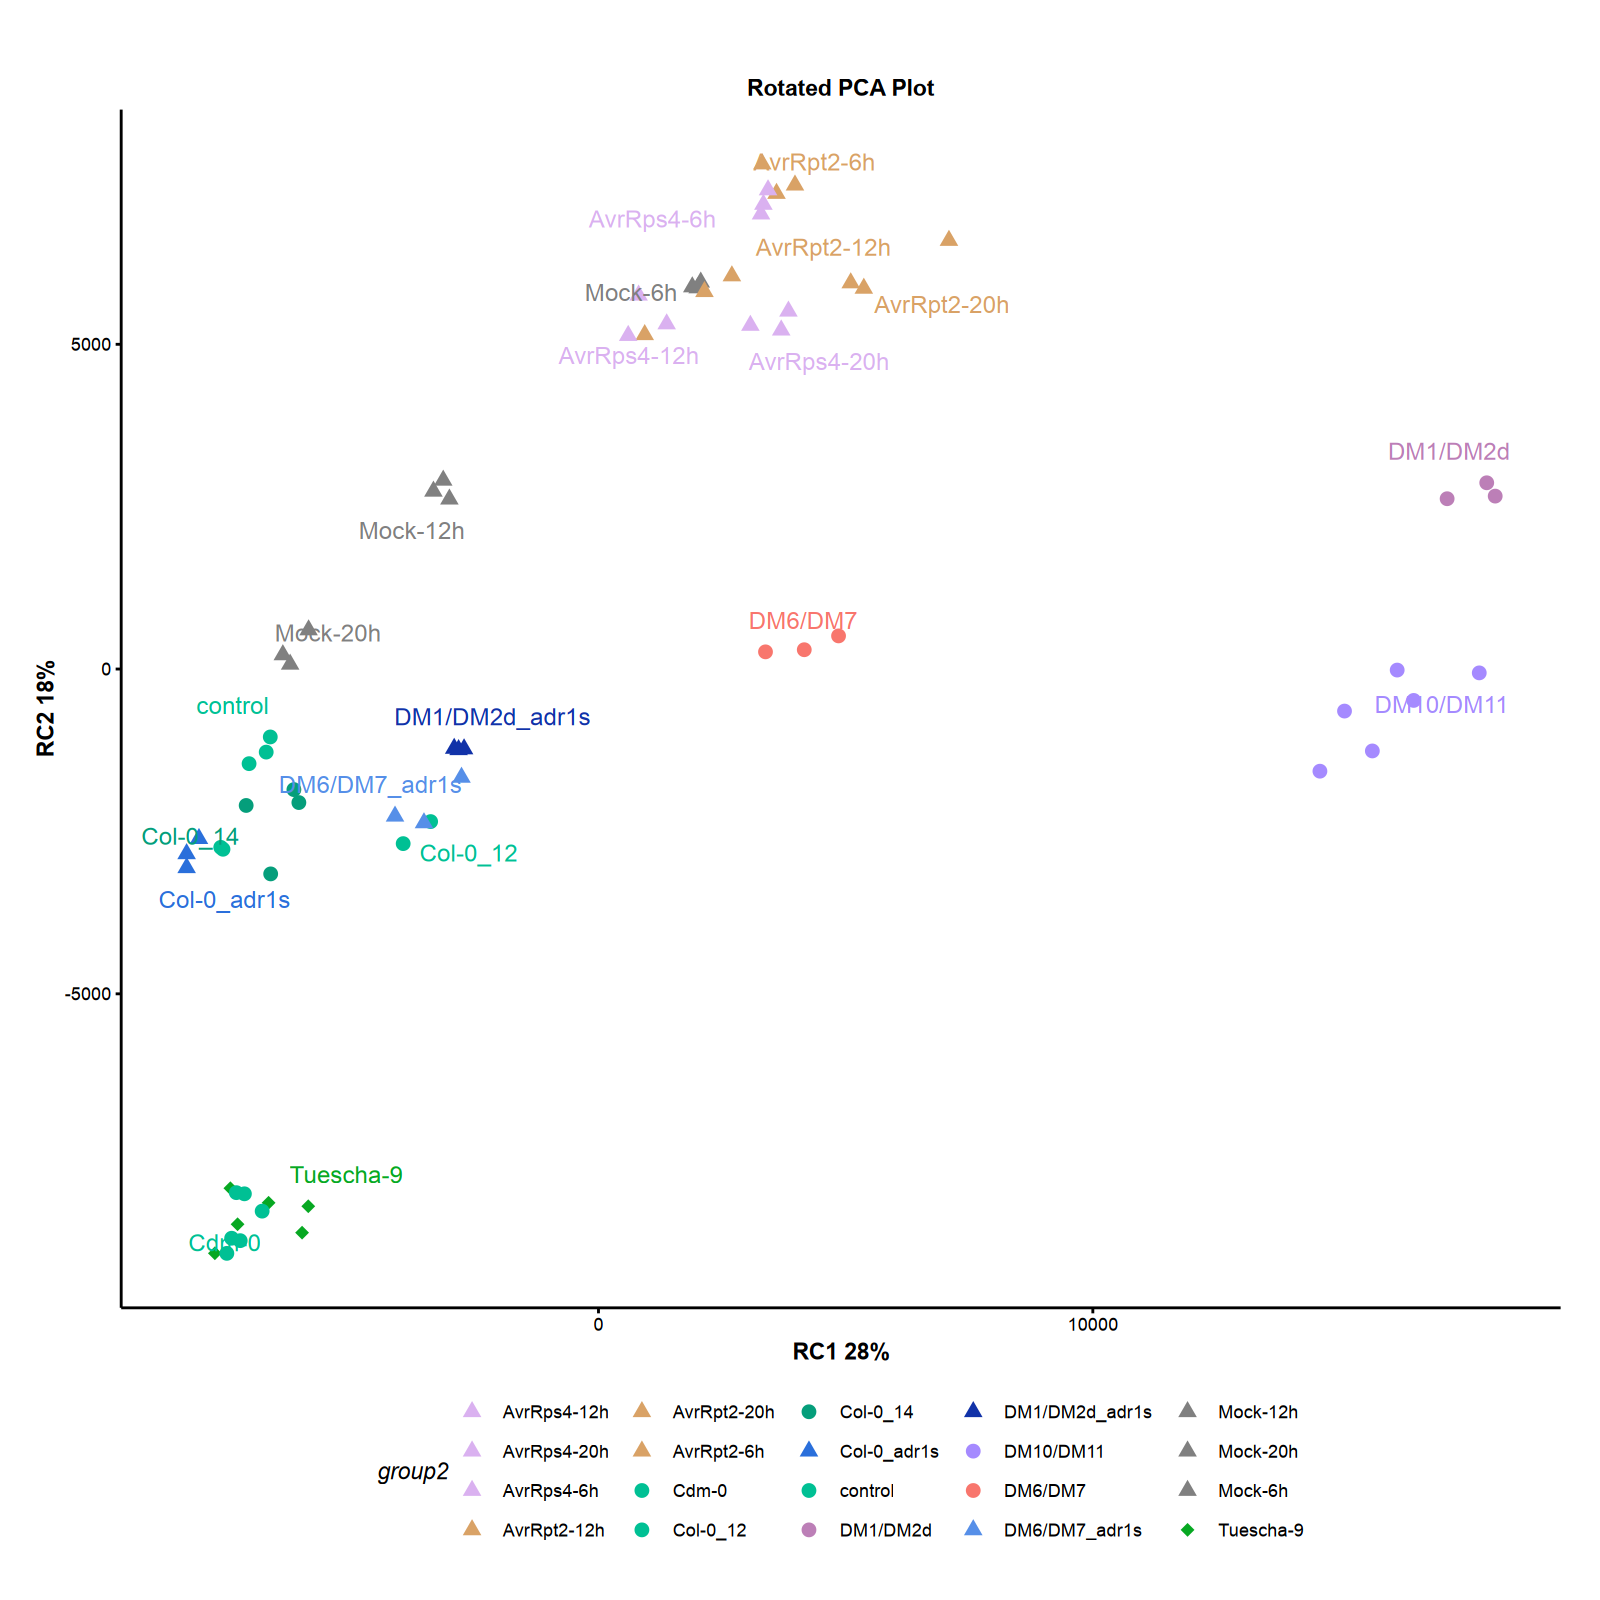

In [54]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=200)

custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#BC7FB7', #'#FB61D7', 
    'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#00C094', 'Col-0_14' = '#059e7b',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00C094',
  "control" = "#00C094",
  "Mock-6h" = "#808080", "Mock-12h" = "#808080", "Mock-20h" = "#808080", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
      "AvrRps4-6h" = "#dab1f0", "AvrRps4-12h" = "#dab1f0", "AvrRps4-20h" = "#dab1f0", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
      "AvrRpt2-6h" = "#d9a266", "AvrRpt2-12h" = "#d9a266", "AvrRpt2-20h" = "#d9a266",
  'DM6/DM7_adr1s' = '#568fe8', 'DM1/DM2d_adr1s' = '#1132a8', 'Col-0_adr1s' = '#2a6fdb'
)

custom_shapes <- c(
  "DM6/DM7" = 16, 'DM1/DM2d' = 16, 'DM10/DM11' = 16,
  'Col-0_12' = 16, 'Col-0_14' = 16,
  'Tuescha-9' = 18, 'Cdm-0' = 16,
  "control" = 16,
  "Mock-6h" = 17, "Mock-12h" = 17, "Mock-20h" = 17, 
  "AvrRps4-6h" = 17, "AvrRps4-12h" = 17, "AvrRps4-20h" = 17, 
  "AvrRpt2-6h" = 17, "AvrRpt2-12h" =17, "AvrRpt2-20h" = 17,
  'DM6/DM7_adr1s' = 17, 'DM1/DM2d_adr1s' = 17, 'Col-0_adr1s' = 17
)


pca_rotate_plot <- rotated_data_df %>% 
  ggplot(aes(x = PC1, y = PC2, color = group2, shape = group2, fill = group2)) +
  labs(
    title = "Rotated PCA Plot",
    x = "Rotated PC1",
    y = "Rotated PC2"
  ) + 
  geom_jitter(size = 2, width = 0.05) + 
  theme_Publication() +
  geom_label_repel(
    aes(label = group2), 
    data = label_data, 
    family = "Arial",  # Set font family to Arial
    size = 3, 
    fill = NA, 
    label.size = NA, 
    segment.color = NA, 
    show.legend = FALSE, 
    max.overlaps = 100
  ) +
  scale_shape_manual(values = custom_shapes, name = "group2") +
      scale_color_manual(values = custom_colors, name = "group2") +
  guides(

  ) +
  xlab(paste0("RC1 ", round(RC1_variance * 100), "%")) +
  ylab(paste0("RC2 ", round(RC2_variance * 100), "%")) +
  theme(legend.position = 'bottom')

pca_rotate_plot

# Save the plot
pca_rotate_plot %>%  ggsave(
    file = paste0("./plots/pca_rotate_plot", Sys.time(), ".pdf"),
    width = 6,
    height = 6.5
  )

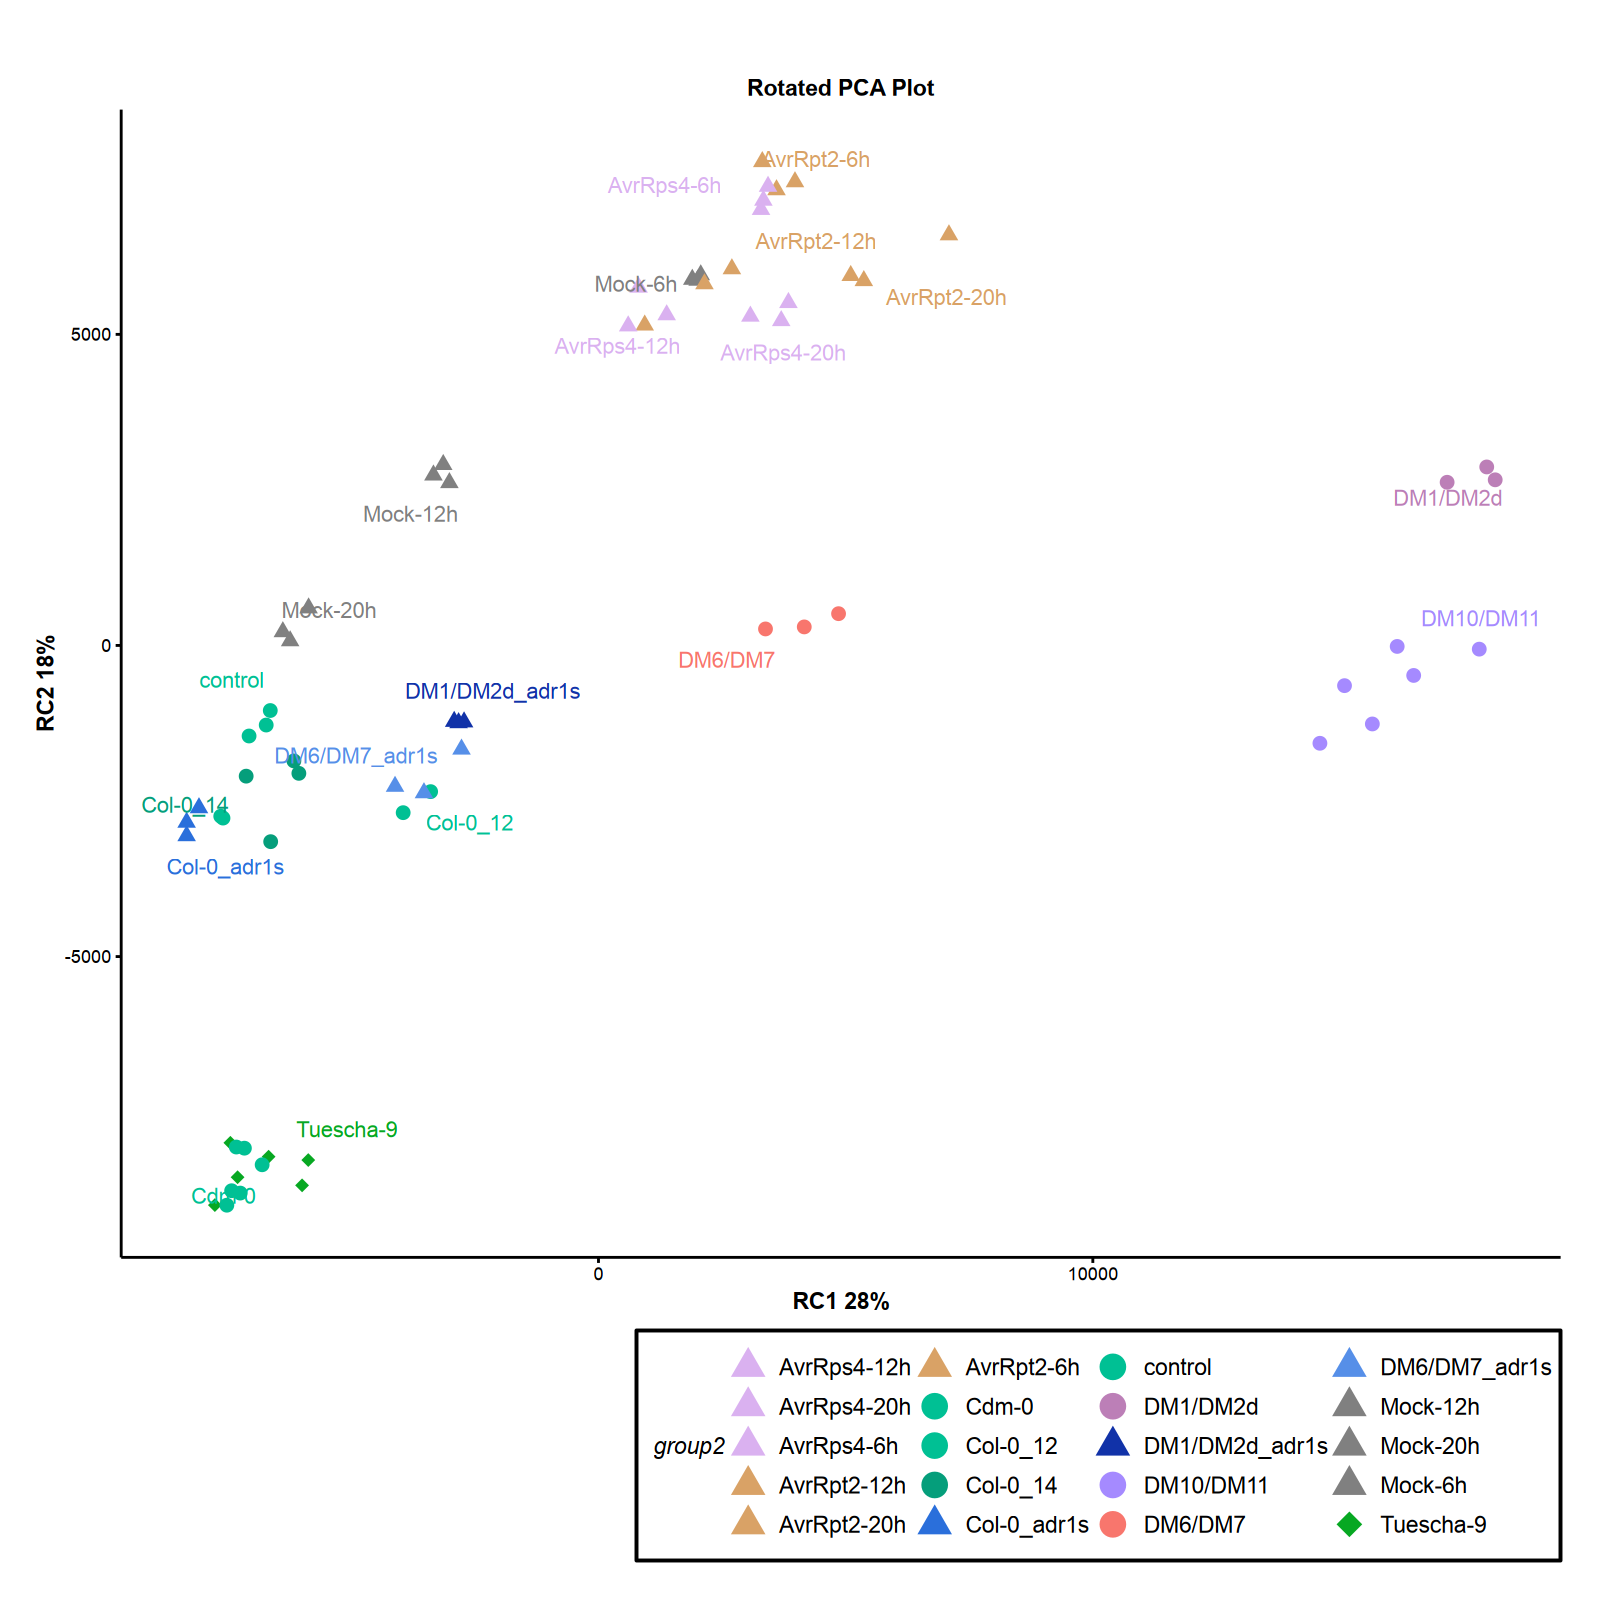

In [55]:
library(ggplot2)
library(ggrepel)

pca_rotate_plot <- rotated_data_df %>% 
  ggplot(aes(x = PC1, y = PC2, color = group2, shape = group2, fill = group2)) +
  labs(
    title = "Rotated PCA Plot",
    x = "Rotated PC1",
    y = "Rotated PC2"
  ) + 
  geom_jitter(size = 2, width = 0.05) + 
  theme_Publication(base_family = "Arial", base_size = 8) +
  geom_label_repel(
    aes(label = group2), 
    data = label_data, 
    family = "Arial",  
    size = 2.67,  # You might need to adjust this size to make it visually appropriate
    fill = NA, 
    label.size = NA, 
    segment.color = NA, 
    show.legend = FALSE, 
    max.overlaps = 100
  ) +
  scale_shape_manual(values = custom_shapes, name = "group2") +
  scale_color_manual(values = custom_colors, name = "group2") +
  guides(
    shape = guide_legend(nrow = 5, override.aes = list(size = 4)),  # Set number of rows for legend keys and adjust key size
    color = guide_legend(nrow = 5)  # Set number of rows for legend keys
  ) +
  theme(
    legend.position  = 'bottom', #c(.98, .02), 
    legend.justification = c(1, 0), 
    legend.box.just = "right",
    legend.margin = margin(6,6,6,6),
    legend.text = element_text(size = 8),  # Set font size for legend text
    legend.background = element_rect(fill = "transparent", colour = "black", size = 0.5),
    legend.key = element_rect(fill = "transparent", colour = "transparent")
  ) +
  xlab(paste0("RC1 ", round(RC1_variance * 100), "%")) +
  ylab(paste0("RC2 ", round(RC2_variance * 100), "%"))

# Print the plot
pca_rotate_plot

# Save the plot
ggsave(
  filename = paste0("./plots/pca_rotate_plot", Sys.time(), ".pdf"),
  plot = pca_rotate_plot,
  width = 6.6,
  height = 6
)


In [56]:
# Save the plot
ggsave(
  filename = paste0("./plots/pca_rotate_plot", Sys.time(), ".pdf"),
  plot = pca_rotate_plot,
  width = 4.5,
  height = 5.5
)

In [57]:
dds <- estimateSizeFactors(dds)
counts_normalized <- DESeq2::counts(dds, normalized=TRUE)  %>% as.data.frame %>% 
    tibble::rownames_to_column(var = "AGI") 

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [58]:
mean_sd_count <- counts_normalized %>%
  pivot_longer(cols = -AGI, names_to = 'sample', values_to = 'count') %>% 
  left_join(sample_data %>% dplyr::select(short_name, group), by = c('sample' = 'short_name')) %>%
  group_by(AGI, group) %>% 
  summarise(mean_count = mean(count),
            sd = sd(count))
mean_sd_count <- mean_sd_count %>% left_join(map_id_name, by = c('AGI' = 'gene_id'))

`summarise()` has grouped output by 'AGI'. You can override using the `.groups`
argument.


In [59]:
mean_sd_count <- mean_sd_count %>% mutate(background = case_when(
  group %>% str_detect('Avr') ~ "Col-0",
  group %>% str_detect('Mock') ~ "Col-0",
  group %>% str_detect('control') ~ "Col-0",
  group %>% str_detect('Col') ~ "Col-0",
  group %>% str_detect('DM1/DM2d') ~ "DM1/DM2d",
  group %>% str_detect('DM6/DM7') ~ "DM6/DM7",
  group %>% str_detect('DM11') ~ "DM10/DM11"
    ))

In [60]:
mean_sd_count %>% pull(group) %>% unique

[1] "AvrRps4-12h"       "AvrRps4-20h"       "AvrRps4-6h"       
 [4] "AvrRpt2-12h"       "AvrRpt2-20h"       "AvrRpt2-6h"       
 [7] "Col-0_12"          "Col-0_12_2"        "Col-0_14"         
[10] "Col-0_adr1s"       "DM1/DM2d"          "DM1/DM2d_adr1s"   
[13] "DM10/DM11"         "DM6/DM7"           "DM6/DM7_adr1s"    
[16] "Mock-12h"          "Mock-20h"          "Mock-6h"          
[19] "Parents_DM10_DM11" "control"

In [61]:
library(dplyr)

mean_sd_count <- mean_sd_count %>%
  mutate(group = factor(group, levels = c('Mock-6h','Mock-12h','Mock-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h','AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','Col-0_12','Col-0_14','Col-0_adr1s','control','DM1/DM2d','DM1/DM2d_adr1s','DM6/DM7','DM6/DM7_adr1s','DM10/DM11','Parents_DM10_DM11')))


In [62]:
create_bar_plot <- function(df, AGI) {
  df_filtered <- df %>%
    filter(AGI == !!AGI)

  ggplot(df_filtered, aes(x = group, y = mean_count, fill = group)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_errorbar(aes(ymin = mean_count - sd, ymax = mean_count + sd), width = 0.2, position = position_dodge(0.9)) +
    theme_minimal() +
    scale_fill_manual(values = custom_colors) +
    labs(x = "Group", y = "Mean Count", title = paste("Bar Plot with Error Bars for AGI", AGI)) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle = 45, hjust = 1)) 
}

# Replace "AT1G01010" with the desired AGI
create_bar_plot(mean_sd_count , "AT1G33560") %>% ggsave(file = paste0('./plots/', 'count_barplot-', Sys.time(), '.pdf'), height = 12, width = 8.3)


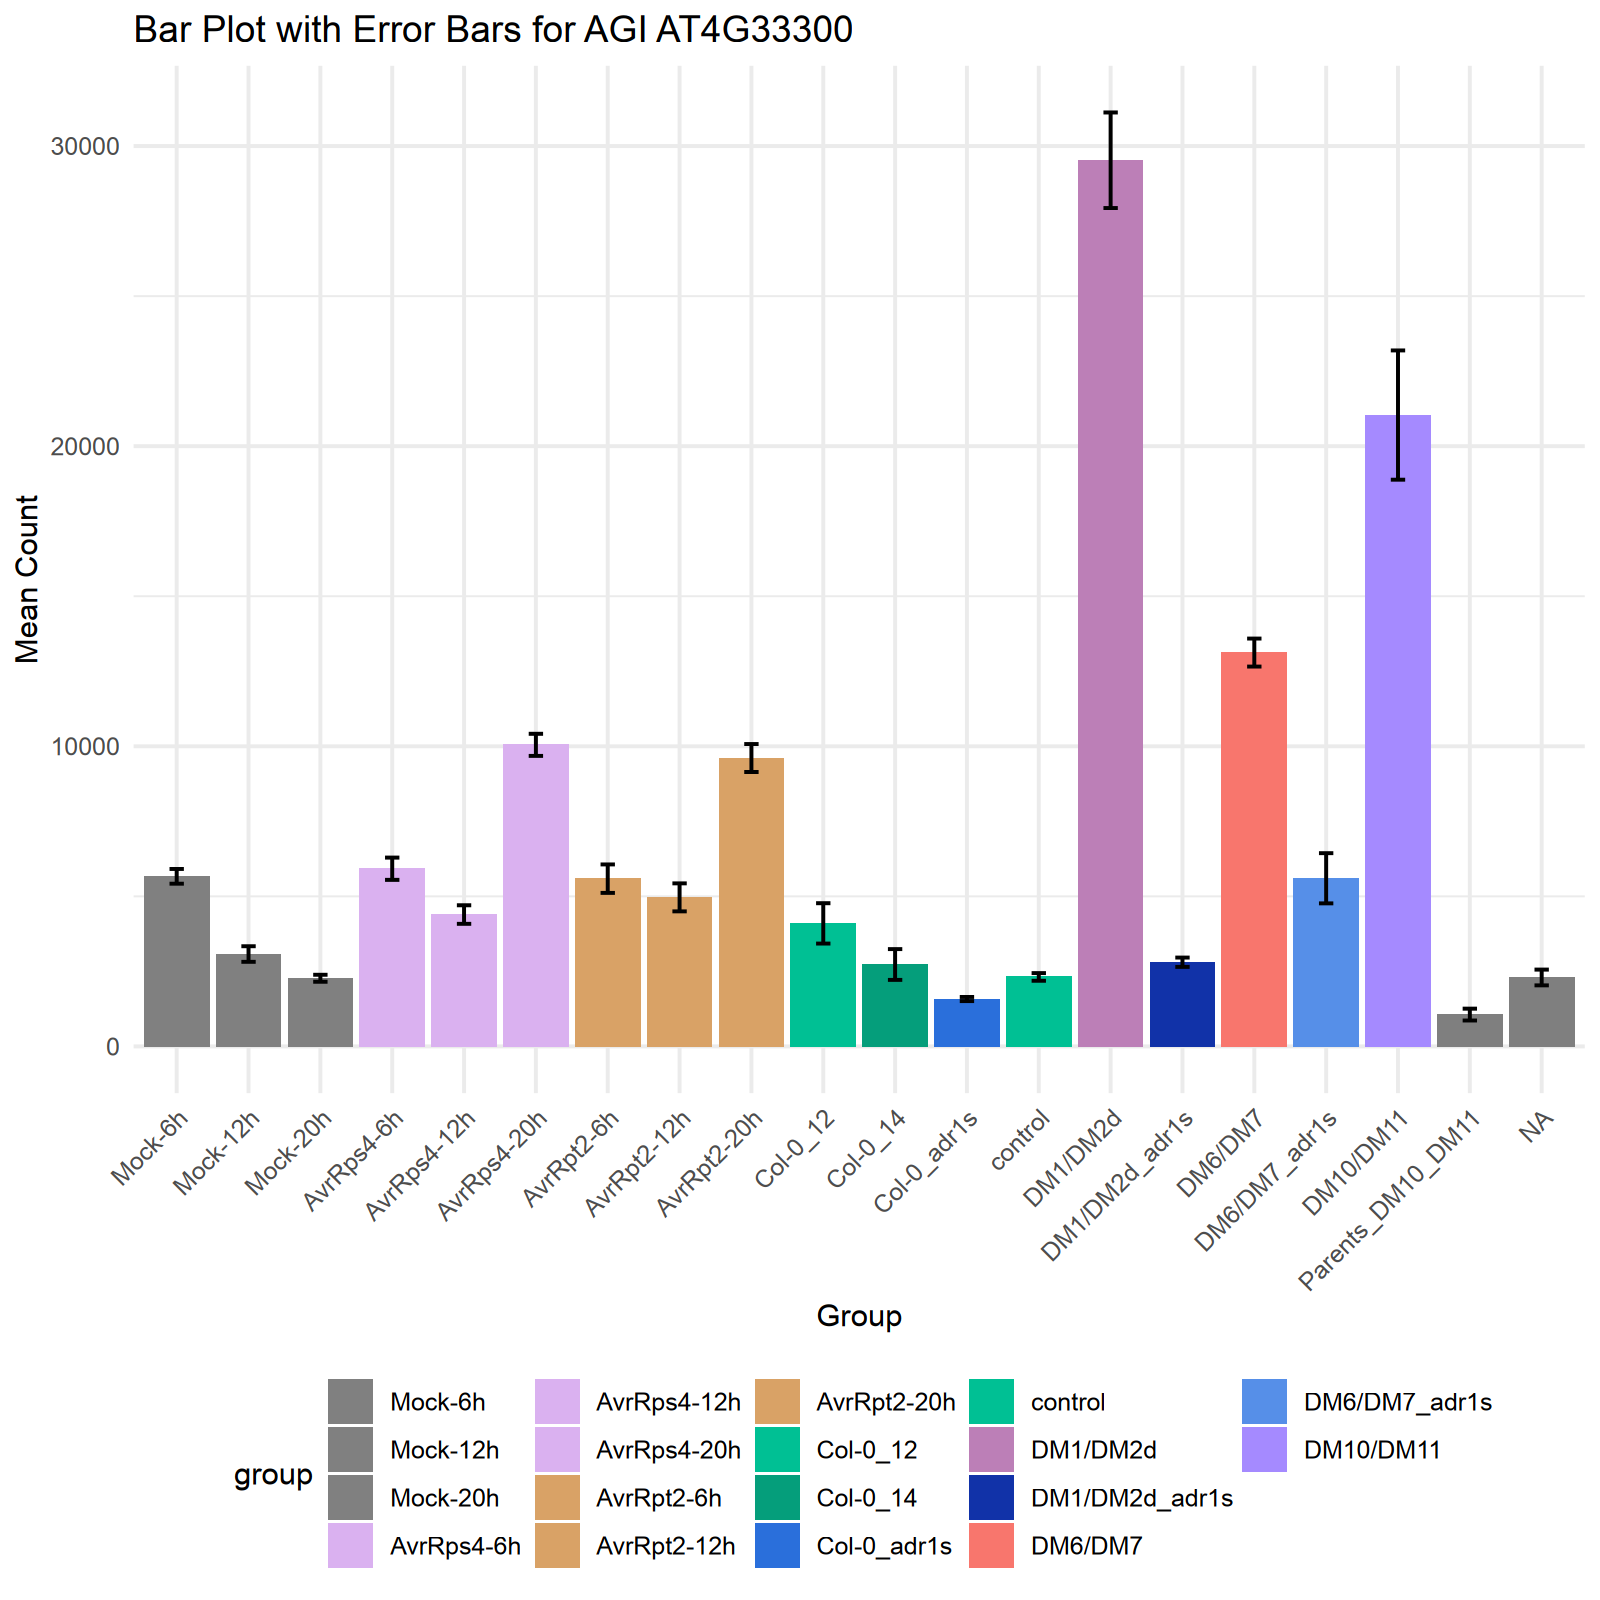

In [63]:
create_bar_plot <- function(df, AGI) {
  df_filtered <- df %>%
    filter(AGI == !!AGI)

  ggplot(df_filtered, aes(x = group, y = mean_count, fill = group)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_errorbar(aes(ymin = mean_count - sd, ymax = mean_count + sd), width = 0.2, position = position_dodge(0.9)) +
    theme_minimal() +
    scale_fill_manual(values = custom_colors) +
    labs(x = "Group", y = "Mean Count", title = paste("Bar Plot with Error Bars for AGI", AGI)) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle = 45, hjust = 1)) 
}

# Replace "AT1G01010" with the desired AGI
create_bar_plot(mean_sd_count , "AT4G33300") #ADR1-L1


# NLRs

In [64]:
counts_fill_color <- c("DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                               'DM10/DM11' = '#D1CDE6',  
                               'DM6/DM7_adr1s' = '#31a354' , 'Col-0_12' = '#5c6ee0',
                               'DM1/DM2d_adr1s' = '#31a354', 'Col-0_adr1s' = '#31a354')

In [65]:
counts_fill_color <- c("DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                               'DM10/DM11' = '#D1CDE6',  
                               'DM6/DM7_adr1s' = '#5c6ee0' , 'Col-0_12' = '#31a354',
                               'DM1/DM2d_adr1s' = '#5c6ee0', 'Col-0_adr1s' = '#5c6ee0')

In [66]:
NLRs_table <- openxlsx::read.xlsx('../gene_table_and_other_scripts//NLRs_167.xlsx') 
NLRs_table <- NLRs_table %>% dplyr::select(AGI, Class, Organization, Symbol) #%>% dplyr::rename('GeneFamily' = 'Class')

In [67]:
NLRs_counts <- mean_sd_count %>% right_join(NLRs_table, by = 'AGI')

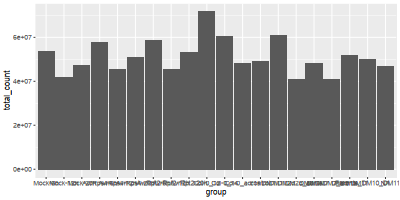

In [68]:
options(repr.plot.width= 8, repr.plot.height=4, repr.plot.res = 50)
mean_sd_count %>% group_by(group) %>% summarise(total_count = sum(mean_count)) %>% 
    ggplot(aes(x= group, y = total_count) ) + geom_bar(stat = 'identity')

In [69]:
groups_to_plot <- c('Col-0_12', 'Col-0_adr1s', 'DM1/DM2d', 'DM1/DM2d_adr1s', 'DM6/DM7', 'DM6/DM7_adr1s')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


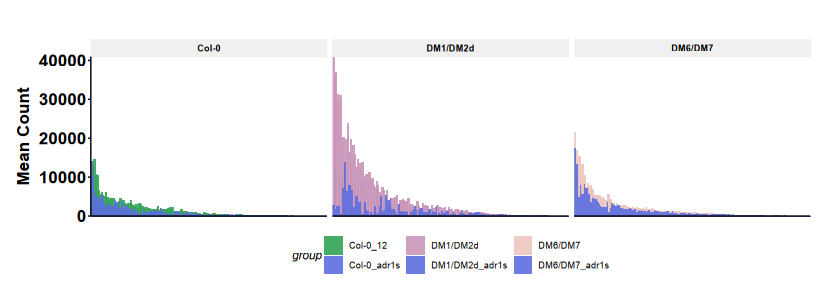

In [70]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 100)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1, aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


In [71]:
NLRs_counts %>% group_by(group) %>% summarise(median = median(mean_count))

group,median
<fct>,<dbl>
Mock-6h,352.6744
Mock-12h,329.3657
Mock-20h,333.1193
AvrRps4-6h,358.0983
AvrRps4-12h,391.1309
AvrRps4-20h,524.4281
AvrRpt2-6h,324.9010
AvrRpt2-12h,480.9981
AvrRpt2-20h,566.1869


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


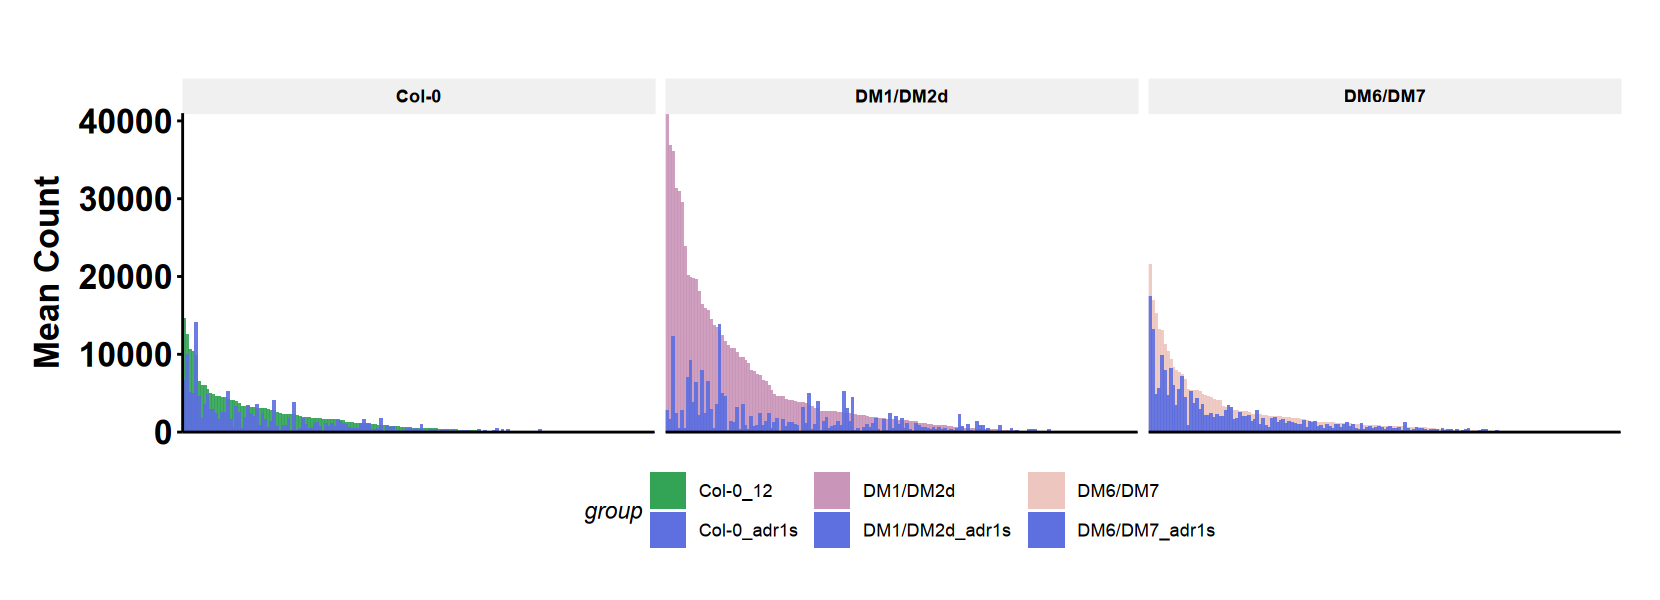

In [72]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1 %>% filter(group %>% str_detect('adr1', neg = TRUE)), aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts1 %>% filter(group %>% str_detect('adr1')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


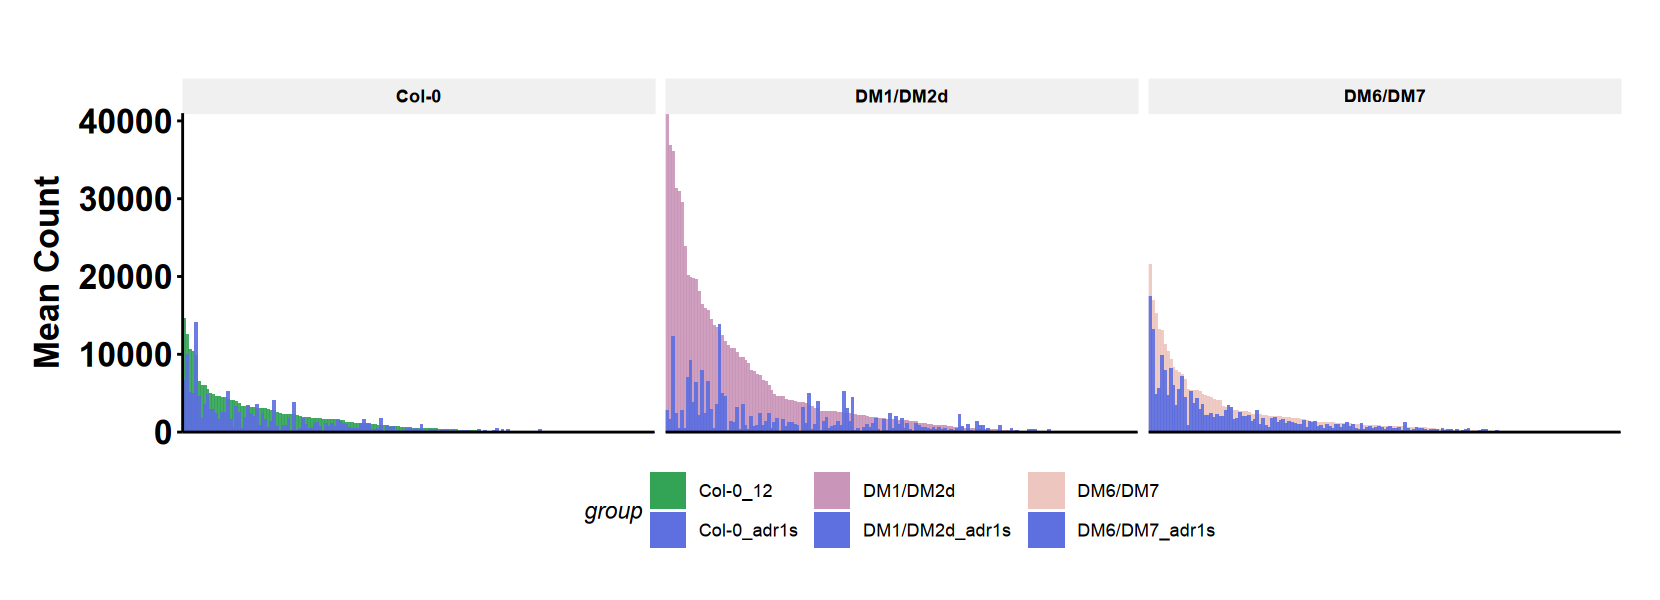

In [73]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1 %>% filter(group %>% str_detect('adr1', neg = TRUE)), aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts1 %>% filter(group %>% str_detect('adr1')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


In [74]:
NLRs_counts2 <- NLRs_counts %>% filter(group %in% c('Col-0_12', 'Col-0_14', 'DM1/DM2d',  'DM6/DM7'))
NLRs_counts2 <- NLRs_counts2 %>% mutate(group2 = case_when(group == 'DM1/DM2d' ~ '12DAG',
                                           group == 'Col-0_12' ~ '12DAG',
                                           group == 'Col-0_14' ~ '14DAG',
                                           group == 'DM6/DM7' ~ '14DAG'))

In [75]:
NLRs_counts2 %>% filter(group %>% str_detect('Col'))

AGI,group,mean_count,sd,gene_name,background,Class,Organization,Symbol,group2
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AT1G10920,Col-0_12,626.767544,53.257410,LOV1,Col-0,NBS-LRR,singleton,LOV1,12DAG
AT1G10920,Col-0_14,544.378529,77.928509,LOV1,Col-0,NBS-LRR,singleton,LOV1,14DAG
AT1G12210,Col-0_12,64.056339,0.987482,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,12DAG
AT1G12210,Col-0_14,13.230366,6.899119,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,14DAG
AT1G12220,Col-0_12,439.357779,29.446737,RPS5,Col-0,CC-NBS-LRR,clustered,RPS5,12DAG
AT1G12220,Col-0_14,349.730478,72.013195,RPS5,Col-0,CC-NBS-LRR,clustered,RPS5,14DAG
AT1G12280,Col-0_12,414.939839,17.370140,SUMM2,Col-0,CC-NBS-LRR,NA,SUMM2,12DAG
AT1G12280,Col-0_14,473.232620,65.422383,SUMM2,Col-0,CC-NBS-LRR,NA,SUMM2,14DAG
AT1G12290,Col-0_12,129.561026,10.124425,AT1G12290,Col-0,CC-NBS-LRR,clustered,L5,12DAG


`summarise()` has grouped output by 'AGI'. You can override using the `.groups`
argument.


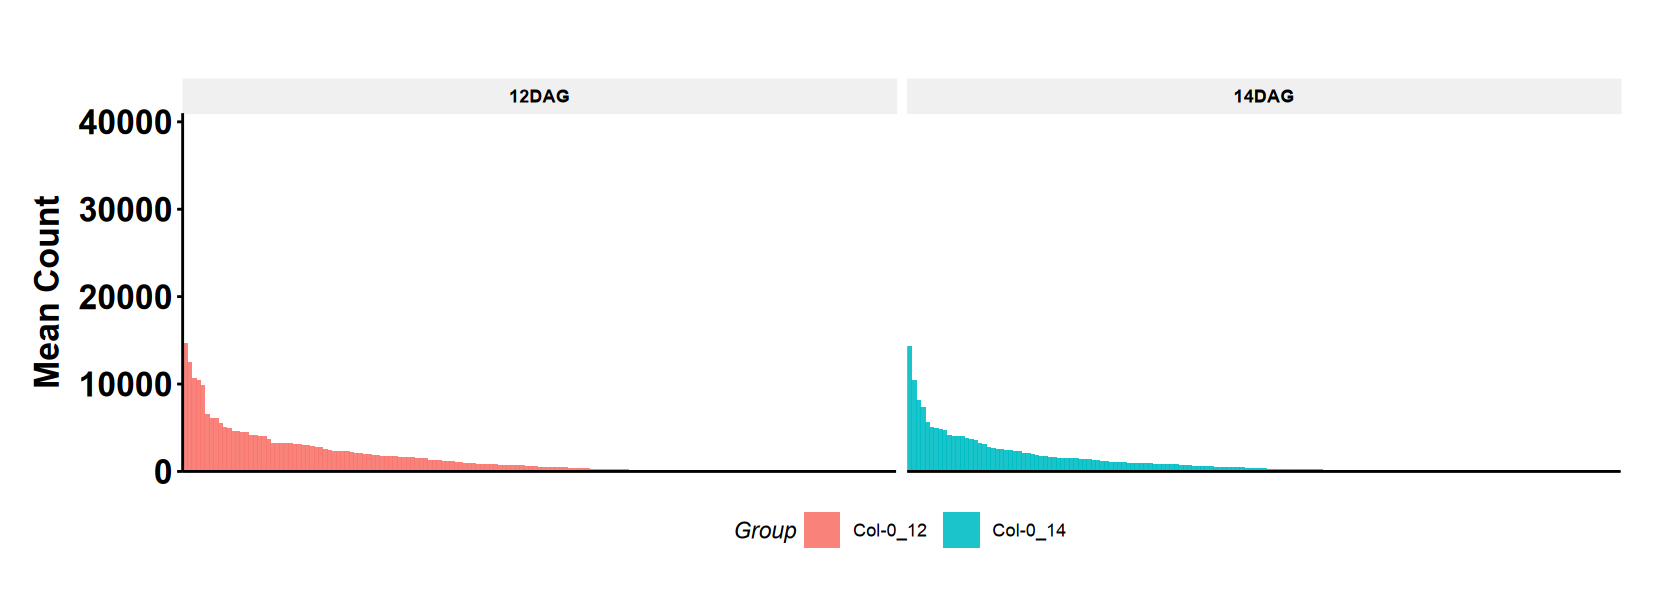

In [76]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts_ordered <- NLRs_counts2 %>%
  group_by(AGI, group) %>%
  summarise(mean_count = mean(mean_count)) %>%
  mutate(ordering = order(-mean_count)) %>%
  ungroup()

bar_profile <- ggplot(NLRs_counts2 %>% filter(group %>% str_detect('Col')), aes(x = reorder(interaction(AGI, group), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
    facet_wrap(~ group2, ncol = 2, scales = "free_x") +
  # scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


`summarise()` has grouped output by 'AGI'. You can override using the `.groups`
argument.


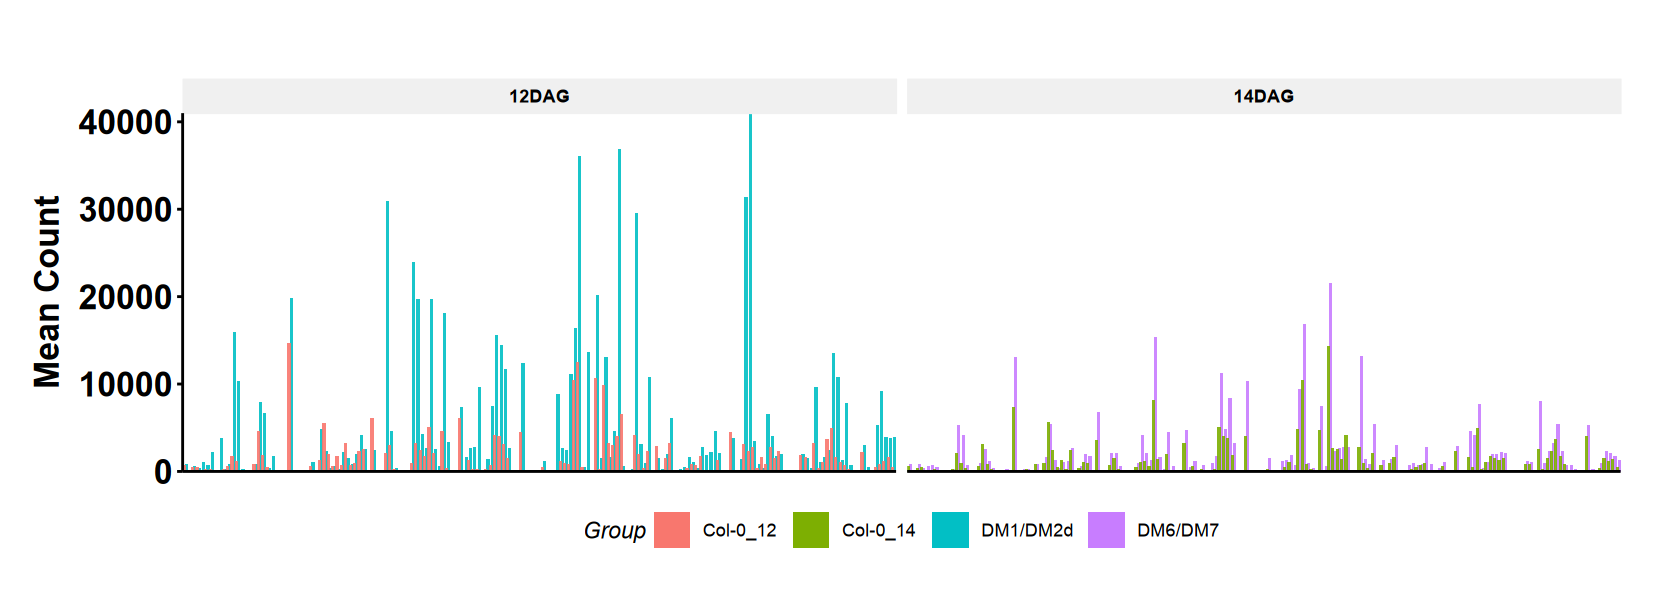

In [77]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts_ordered <- NLRs_counts2 %>%
  group_by(AGI, group) %>%
  summarise(mean_count = mean(mean_count)) %>%
  mutate(ordering = order(-mean_count)) %>%
  ungroup()

bar_profile <- ggplot(NLRs_counts2 %>% filter(group %>% str_detect('DM')), aes(x = reorder(interaction(AGI, group), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts2 %>% filter(group %>% str_detect('Col')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
    facet_wrap(~ group2, ncol = 2, scales = "free_x") +
  # scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


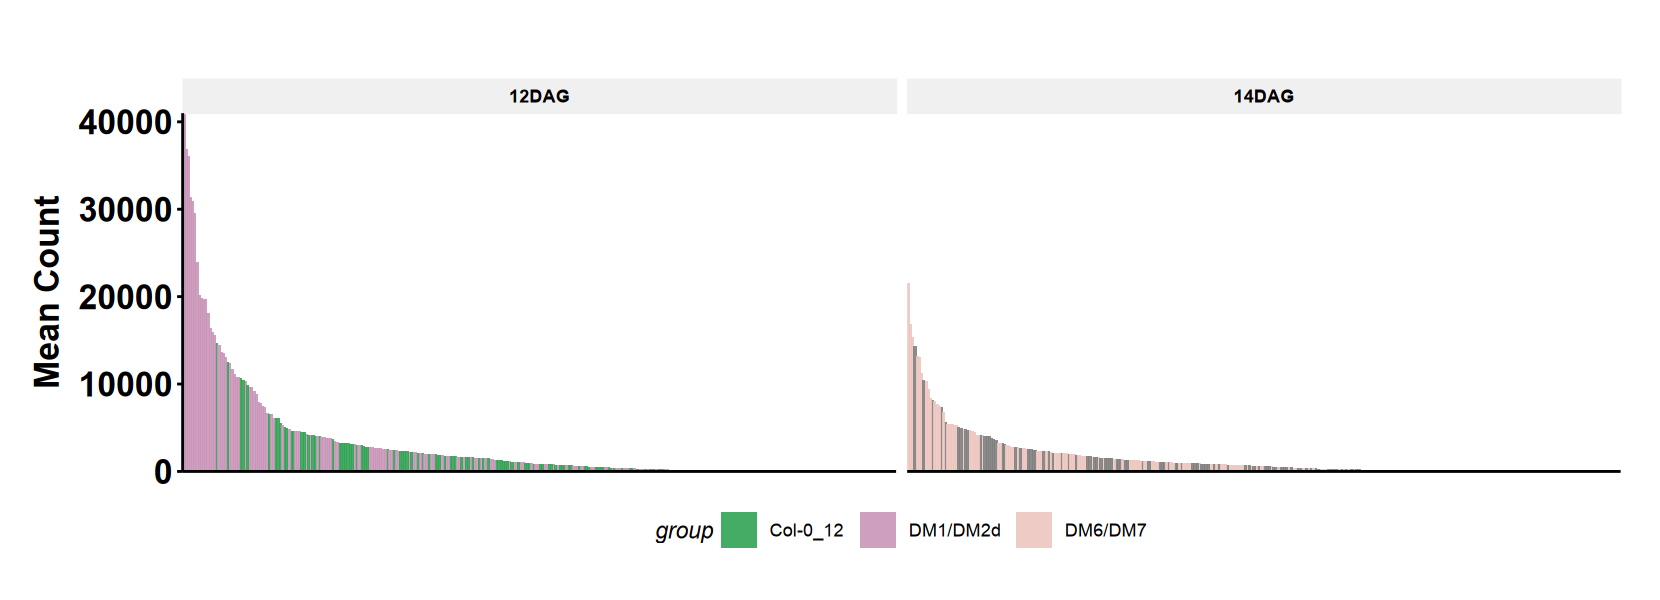

In [78]:
library(tidytext)

bar_profile <- ggplot(NLRs_counts2, aes(x = reorder_within(interaction(AGI, group), -mean_count, group2), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity", alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_wrap(~ group2, ncol = 2, scales = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
  theme_Publication() + coord_cartesian(ylim = c(0, 41000)) +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
  theme(axis.text = element_text(size = 12, face = "bold"),
        axis.title = element_text(size = 12, face = "bold"),
        axis.title.x = element_blank()) +
  scale_x_reordered() # This line adds the reordering

bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


In [79]:
counts_fill_color

DM6/DM7       DM1/DM2d      DM10/DM11  DM6/DM7_adr1s       Col-0_12 
     "#EDC5BF"      "#C894B8"      "#D1CDE6"      "#5c6ee0"      "#31a354" 
DM1/DM2d_adr1s    Col-0_adr1s 
     "#5c6ee0"      "#5c6ee0"

In [80]:
NLRs_counts_Avr <- NLRs_counts %>% filter(group %>% str_detect('Avr|Mock'))

In [81]:
NLRs_counts_Avr %>% ungroup %>% sample_n(60)

AGI,group,mean_count,sd,gene_name,background,Class,Organization,Symbol
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
AT1G56510,AvrRpt2-6h,1182.790209,161.0424866,WRR4,Col-0,TIR-NBS-LRR,clustered,WRR4
AT1G12280,Mock-6h,286.260240,6.7808407,SUMM2,Col-0,CC-NBS-LRR,NA,SUMM2
AT3G04210,AvrRps4-6h,3230.244257,234.3562746,AT3G04210,Col-0,TIR-NBS,clustered,TN13
AT5G38350,AvrRps4-6h,2.618205,1.7310631,AT5G38350,Col-0,NBS-LRR,singleton,AT5G38350
AT5G43740,AvrRps4-12h,714.668196,167.5311197,AT5G43740,Col-0,CC-NBS-LRR,clustered,AT5G43740
AT4G36150,AvrRpt2-12h,177.152019,10.2357986,AT4G36150,Col-0,TIR-NBS-LRR,clustered,AT4G36150
AT3G50950,Mock-6h,4873.585501,234.2248543,ZAR1,Col-0,CC-NBS-LRR,singleton,ZAR1
AT4G10780,AvrRpt2-6h,4.730388,2.7001450,AT4G10780,Col-0,CC-NBS-LRR,NA,AT4G10780
AT4G19530,Mock-12h,1849.834415,411.4281607,AT4G19530,Col-0,TIR-NBS-LRR,clustered,AT4G19530


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


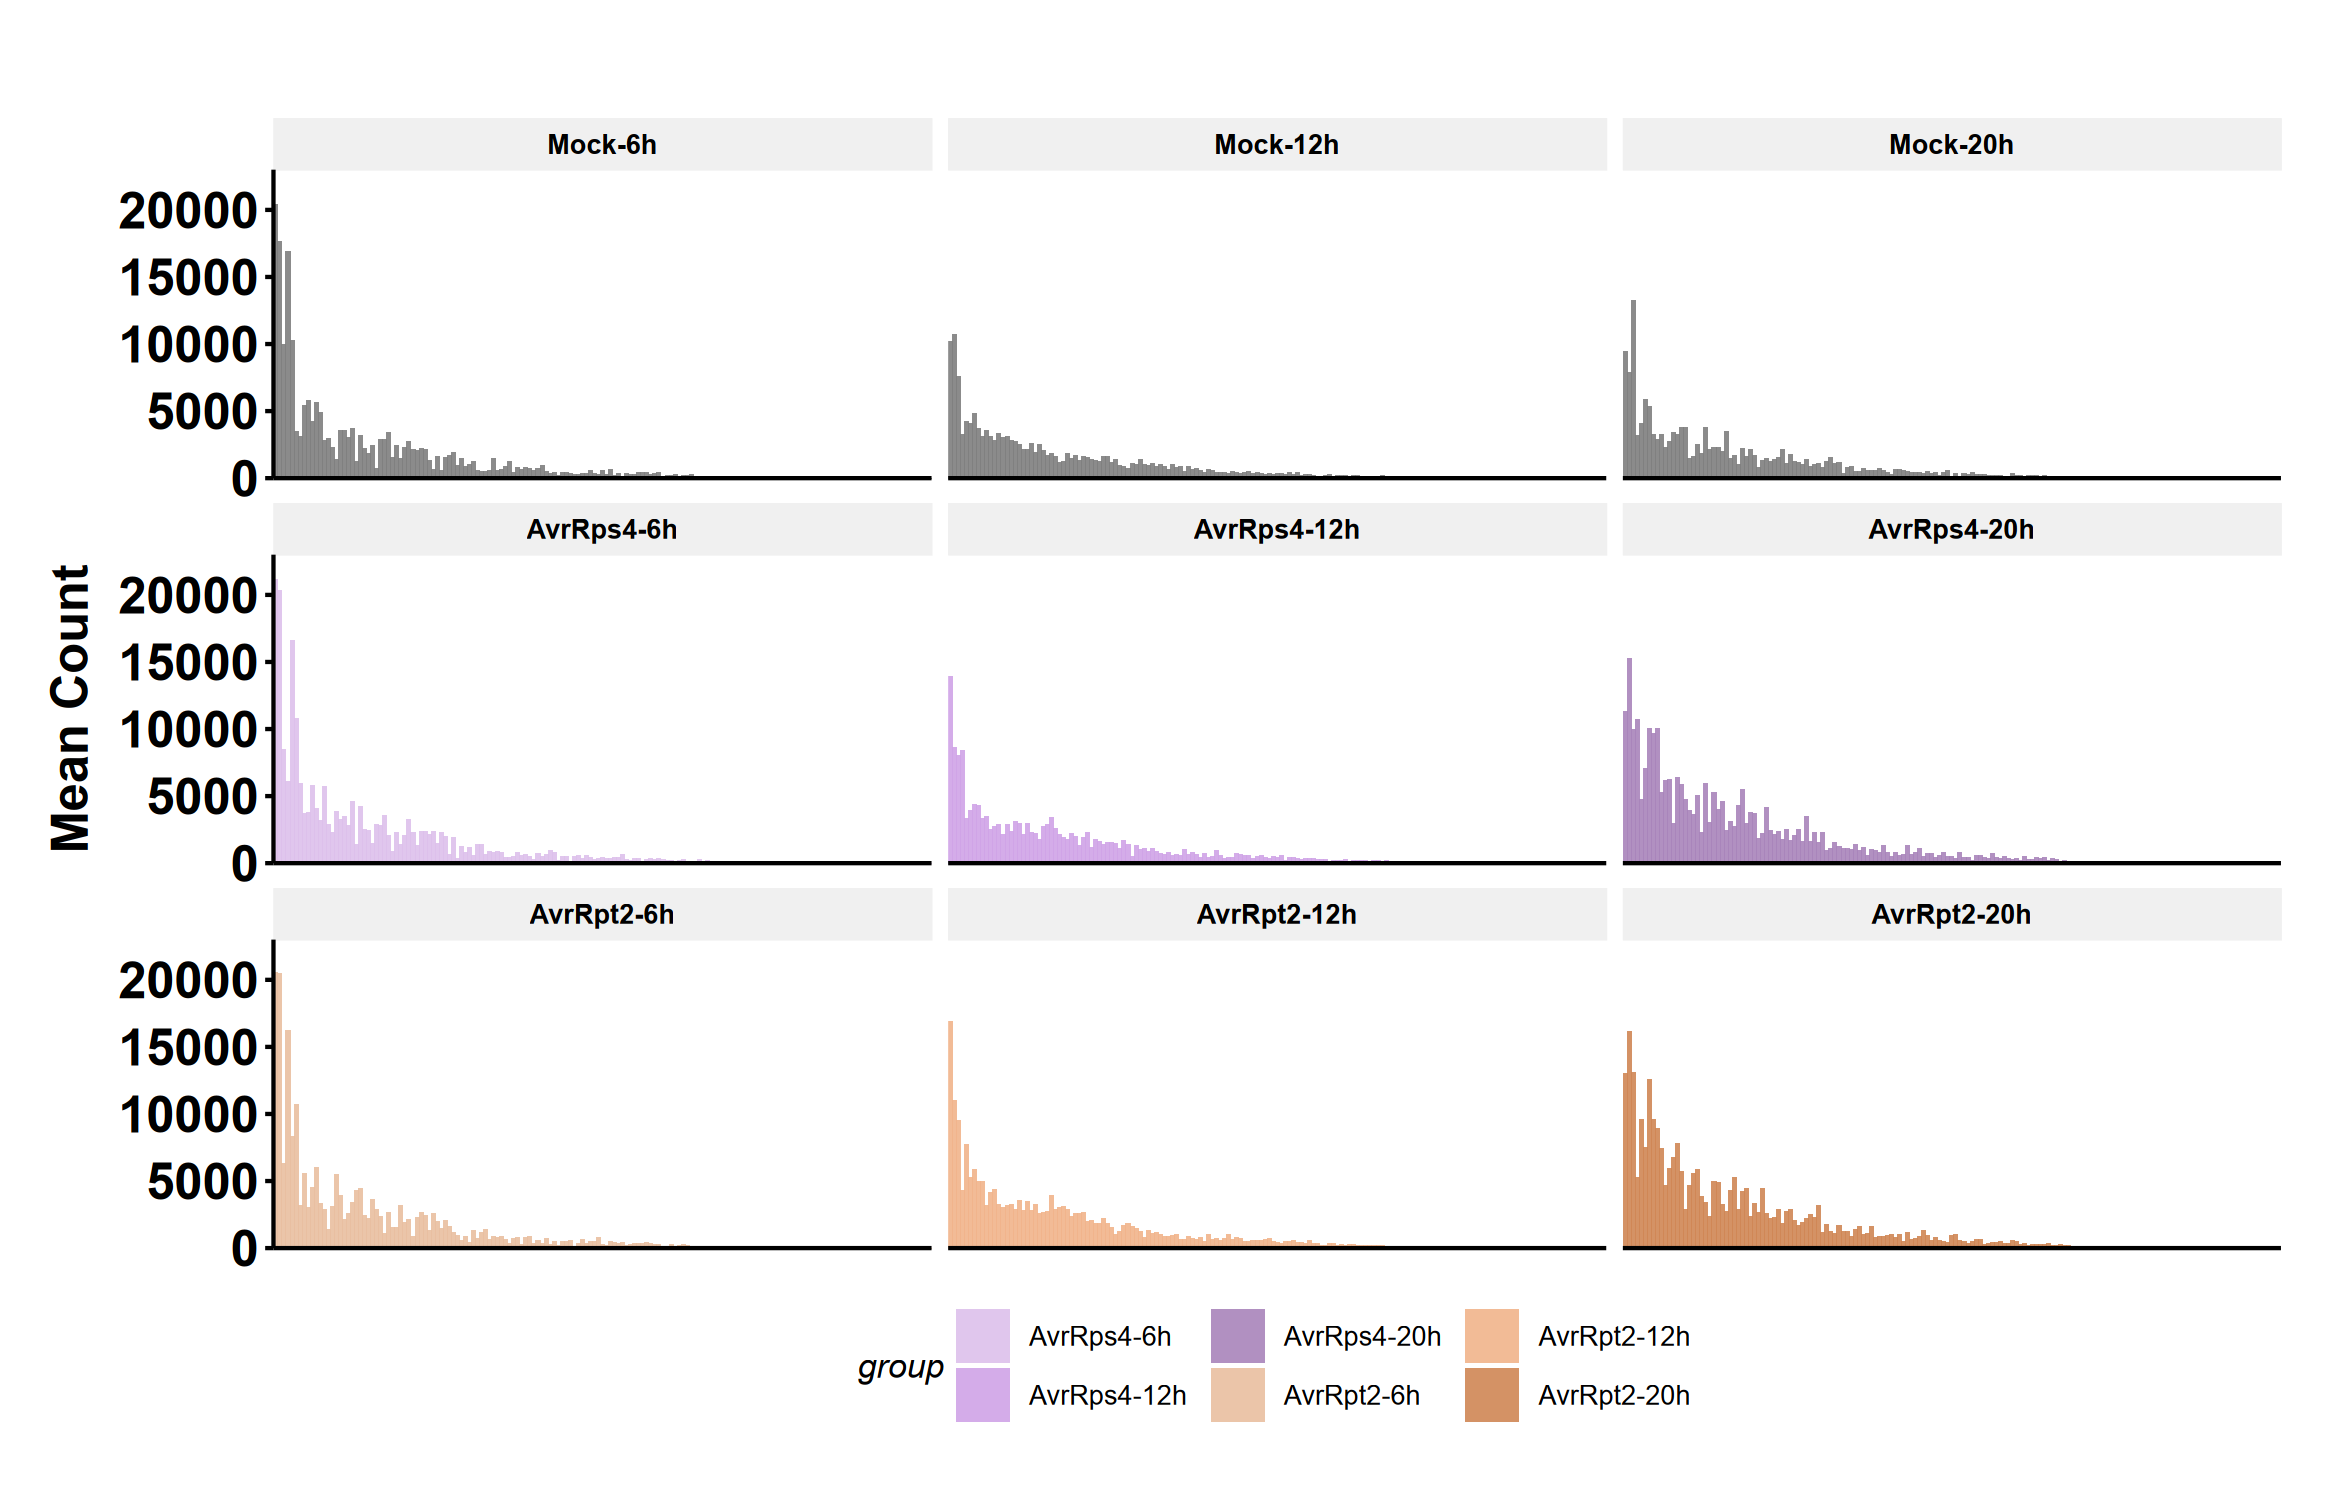

In [82]:
width_ = 7.8
height_ = 5
options(repr.plot.width= width_, repr.plot.height= height_, repr.plot.res = 300)

# NLRs_counts_Avr <- NLRs_counts %>% filter(group %>% str_detect('Avr'))
NLRs_counts_Avr <- NLRs_counts_Avr %>% mutate(treatment = group %>% str_remove('-\\d{1,2}h$'))

bar_profile <- ggplot(NLRs_counts_Avr, aes(x = reorder(interaction(AGI, treatment), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  # facet_grid(cols = vars(group), scales = "free_x", space = "free_x") +
facet_wrap(~ group, ncol = 3, scales = "free_x") +
  scale_fill_manual(values = c(      "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")) +
    theme_Publication() + coord_cartesian(ylim=c(0, 23000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = height_, width = width_)


In [83]:
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.jpeg'), height = 3, width = 8.2)

# Bar plot of NLRs

In [84]:
library(glue)
library(ggtext)
library(ggh4x)
library(ggbreak) 


Attaching package: ‘glue’


The following object is masked from ‘package:SummarizedExperiment’:

    trim


The following object is masked from ‘package:GenomicRanges’:

    trim


The following object is masked from ‘package:IRanges’:

    trim




ERROR: Error in library(ggbreak): there is no package called ‘ggbreak’


### choose significantly changed NLRs

In [ ]:
Res_combined <-  readRDS('../Pathway_plot/Rdata/Res_combined.rds')

sig_NLRs <- Res_combined %>% filter(source %in% groups_to_plot ) %>% right_join(NLRs_table, by = 'AGI') %>%
    filter(abs(log2FC ) > 1)  %>% pull(AGI) %>% unique 
sig_NLRs %>% length

### make color markdown

In [ ]:
cols_text <- c( 'TIR-NBS-LRR' =  "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          
          'NBS-LRR' = "#b3b330",
          'P-loop' = "#7fc97f"
         )
cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% dplyr::rename(label_color = 2)

In [ ]:
sigNLRs_counts <- NLRs_counts %>% filter(AGI %in% sig_NLRs) 

In [ ]:
sigNLRs_counts <- sigNLRs_counts %>% group_by(AGI) %>%
  filter(any(mean_count > 10)) %>% ungroup()

In [ ]:
sigNLRs_counts <- sigNLRs_counts %>% 
    mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    left_join(cols_text_2, by = 'Class')  

In [ ]:
# Extract plot_label and label_color from Res_NLRs_up
plot_label_color <- sigNLRs_counts %>% dplyr::select(plot_label, label_color)

# Create a named list with label_color as content and plot_label as names
color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)


In [ ]:
NLRs_color <- sigNLRs_counts %>% mutate(label_color_markdown =
        glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 


In [ ]:
NLRs_color_max <- NLRs_color  %>% arrange( -mean_count)  %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>%
    arrange(mean_count)

In [ ]:
NLRs_color_min <- NLRs_color  %>% arrange(mean_count)  %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>%
    arrange(mean_count)

In [ ]:
NLRs_color_Col <- NLRs_color  %>% filter(group == 'Col-0_12') %>% arrange(mean_count)

In [ ]:
library(purrr)
NLRs_color_temp <- NLRs_color %>% arrange(desc(mean_count))
layers <- list()

# Step 3: Iterate until there are no rows left in over0 and below0
layer_num <- 1
while (nrow(NLRs_color_temp) > 0) {
    current_max_NLR <- NLRs_color_temp %>% group_by( AGI) %>% slice_max(mean_count)
    NLRs_color_temp <- suppressMessages(anti_join(NLRs_color_temp, current_max_NLR))
    layers[[layer_num]] <- current_max_NLR
    layer_num <- layer_num + 1
}

# TIR_only

In [ ]:
TIR_only <- readxl::read_excel("../gene_table_and_other_scripts/Col-0 TIR domains from WanLi.xlsx") 

In [ ]:
TIR_only <- TIR_only %>% dplyr::select(AGI) %>% left_join(mean_sd_count, by ='AGI')

In [ ]:
TIR_only 

In [ ]:
NLRs_in_connectivity_table <- read.csv('./WGCNA_output_all/NLRs_in_connectivity_table.csv') 

In [ ]:
library(purrr)


In [ ]:
options(repr.plot.width= 8, repr.plot.height=11, repr.plot.res = 100)

create_barplot <- function(NLRs_color) {

  NLRs_color_temp <- NLRs_color %>% arrange(desc(mean_count))
  layers <- list()

  layer_num <- 1
  while (nrow(NLRs_color_temp) > 0) {
      current_max_NLR <- NLRs_color_temp %>% group_by(AGI) %>% slice_max(mean_count)
      NLRs_color_temp <- suppressMessages(anti_join(NLRs_color_temp, current_max_NLR))
      layers[[layer_num]] <- current_max_NLR
      layer_num <- layer_num + 1
  }

  NLRs_plot_base <- NLRs_color %>% ggplot(aes(x = label_color_markdown,
                                              fill = group, 
                                              y = mean_count, label = label_color_markdown)) +
      labs(y = "mean_count") +
      coord_flip() +
      guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
      scale_y_continuous(expand = c(0, 0), 
                         breaks = c(0, 20000, 40000), 
                         limits = c(0, 41000), 
                         oob = scales::squish) +
      scale_fill_manual(values = counts_fill_color)+
      theme_Publication() +
      theme(axis.text = element_text(size = 10, face = "bold"),
            axis.title = element_text(size = 12, face = "bold"),
            axis.title.y = element_blank()) +
      theme(text = element_text(size = 12, family = "sans", face = 'bold')) +
      facet_grid(rows = vars(Class), cols = vars(background),
                  scales = "free",    space = "free") +
      theme(axis.text.y = element_markdown())   +
      geom_bar(data = NLRs_color_max, aes(x = reorder(label_color_markdown, mean_count)),
               position = "identity",  stat = 'identity', 
               aes(fill = group), width = .8,  alpha = 0 ) 

  bar_NLRs <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               width = .8,
               alpha = 0.8)
  }, .init = NLRs_plot_base)

  return(bar_NLRs)
}

# Assuming NLRs_color is your data frame
resulting_plot <- create_barplot(NLRs_color %>% filter(AGI %in% NLRs_in_connectivity_table$gene))
resulting_plot

# bar_NLRs %>% ggsave(file = paste0('./plots/', 'count_barplot-', Sys.time(), '.pdf'), height = 16, width = 8.3)
